# Latar Belakang
Sebuah perusahaan yang bergerak di bidang retail, ingin mengetahui *consumen behaviour*, oleh karena itu perusahaan ini menyewa jasa *data scientist*. Perusahaan ingin melakukan studi kasus dari data yang ada.

 

## Pernyataan Masalah
Perusahaan ingin mengetahui **hal-hal apa saja yang mempengaruhi consumen behaviour, produk-produk apa saja yang diminati dan strategi marketing yang pas dengan karateristik konsumen**. Informasi ini akan membantu perusahaan untuk melakukan apa saja agar dapat melakukan tindakan yang tepat untuk para konsumennya secara tepat. 

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind,shapiro

import warnings
warnings.filterwarnings("ignore")

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise


**Place**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [183]:
df= pd.read_csv("Supermarket Customers.csv", delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**Data Understanding and Cleaning**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.



In [184]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [185]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [186]:
df.duplicated().sum()

0

In [187]:
pd.set_option('display.max_colwidth',1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum, kita bisa melihat bahwa di data ini:

- dataset perusahaan memiliki 29 kolom dan 2240 baris.
- memiliki missing value di satu kolom saja, yaitu `Income` dan data tidak memiliki duplicate.
- dinama kolom `Income` ada spasi maka kita perlu melakukan perubahan agar bisa melakukan penelitian dengan mudah.
- pada kolom `Z_CostContact` dan `Z_Revenue` memiliki data yang isinya sama seperti pada `Z_CostContact` memiliki isi data 3 semua dan `Z_Revenue` memiliki isi 11 semua. Hal ini tidak ada pengaruh dalam penelitian ini sehingga dapat dihilangkan.
- pada `DT_Customer` merupakan object, maka kita harus merubahnya mejadi datetime64[ns].
- pada kolom `Marital_Status` berisikan `Single`, `Together`, `Married`, `Divorced`, `Widow`, `Alone`, `Absurd`,`YOLO`, disini bisa dilihat disini kita bisa merubahnya menjadi `Alone`, `Absurb` dan `YOLO` bisa dikategorikan sebagai `Single` dan `Widow` bisa disatukan dengan `Divorced`. 
- pada kolom `Education` berisikan `Basic`, `2n Cycle`, `Graduation`, `Master` dan `PhD`. Maka kita perlu melakukan perubahan `Basic` menjadi `Non Graduate` dan `2n Cycle` menjadi `Master`.
- beberapa data kategori, bisa dibuatkan kolom baru berdasarkan rangking kategori untuk memudahkan analisis (opsional).

### Missing Value

In [188]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [189]:
# persentase missing value di tiap kolom
(df['Income'].isna().sum()/2240)*100


1.0714285714285714

Disini kita bisa melihat bahwa data miss di `Income` sebesar 1.07%, maka ada 2 (dua) cara untuk menangani *missing value*, yaitu:
- pertama, menghapus baris/ kolom yang berisi *missing value*. cara ini tidak disarankan dalam kasus kita, padahal jumlah *missing value* masih dalam kategori aman untuk dihapus (karena data *missing value* yaitu 1.07%. masih dibawah 3%).
- kedua, mengisi data ynag hilang. Cara ini lebih disarankan. Ada beberapa cara untuk mengisi data yang missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya atau sedekat mungkin dengan nilai asli.
- kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada yang tidak bisa diisi barulah kita mengisi dengan angka *mean, median, atau modus*(menghapus data akan menjadi opsi terakhir).

Kita sudah melihat gambaran kasar anomali yang ada di dalam data kita, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

***Merubah nama kolom dan mengisi *Missing Value* yang ada di kolom `Income`***

In [190]:
df= df.rename(columns={'    Income':'Income'})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


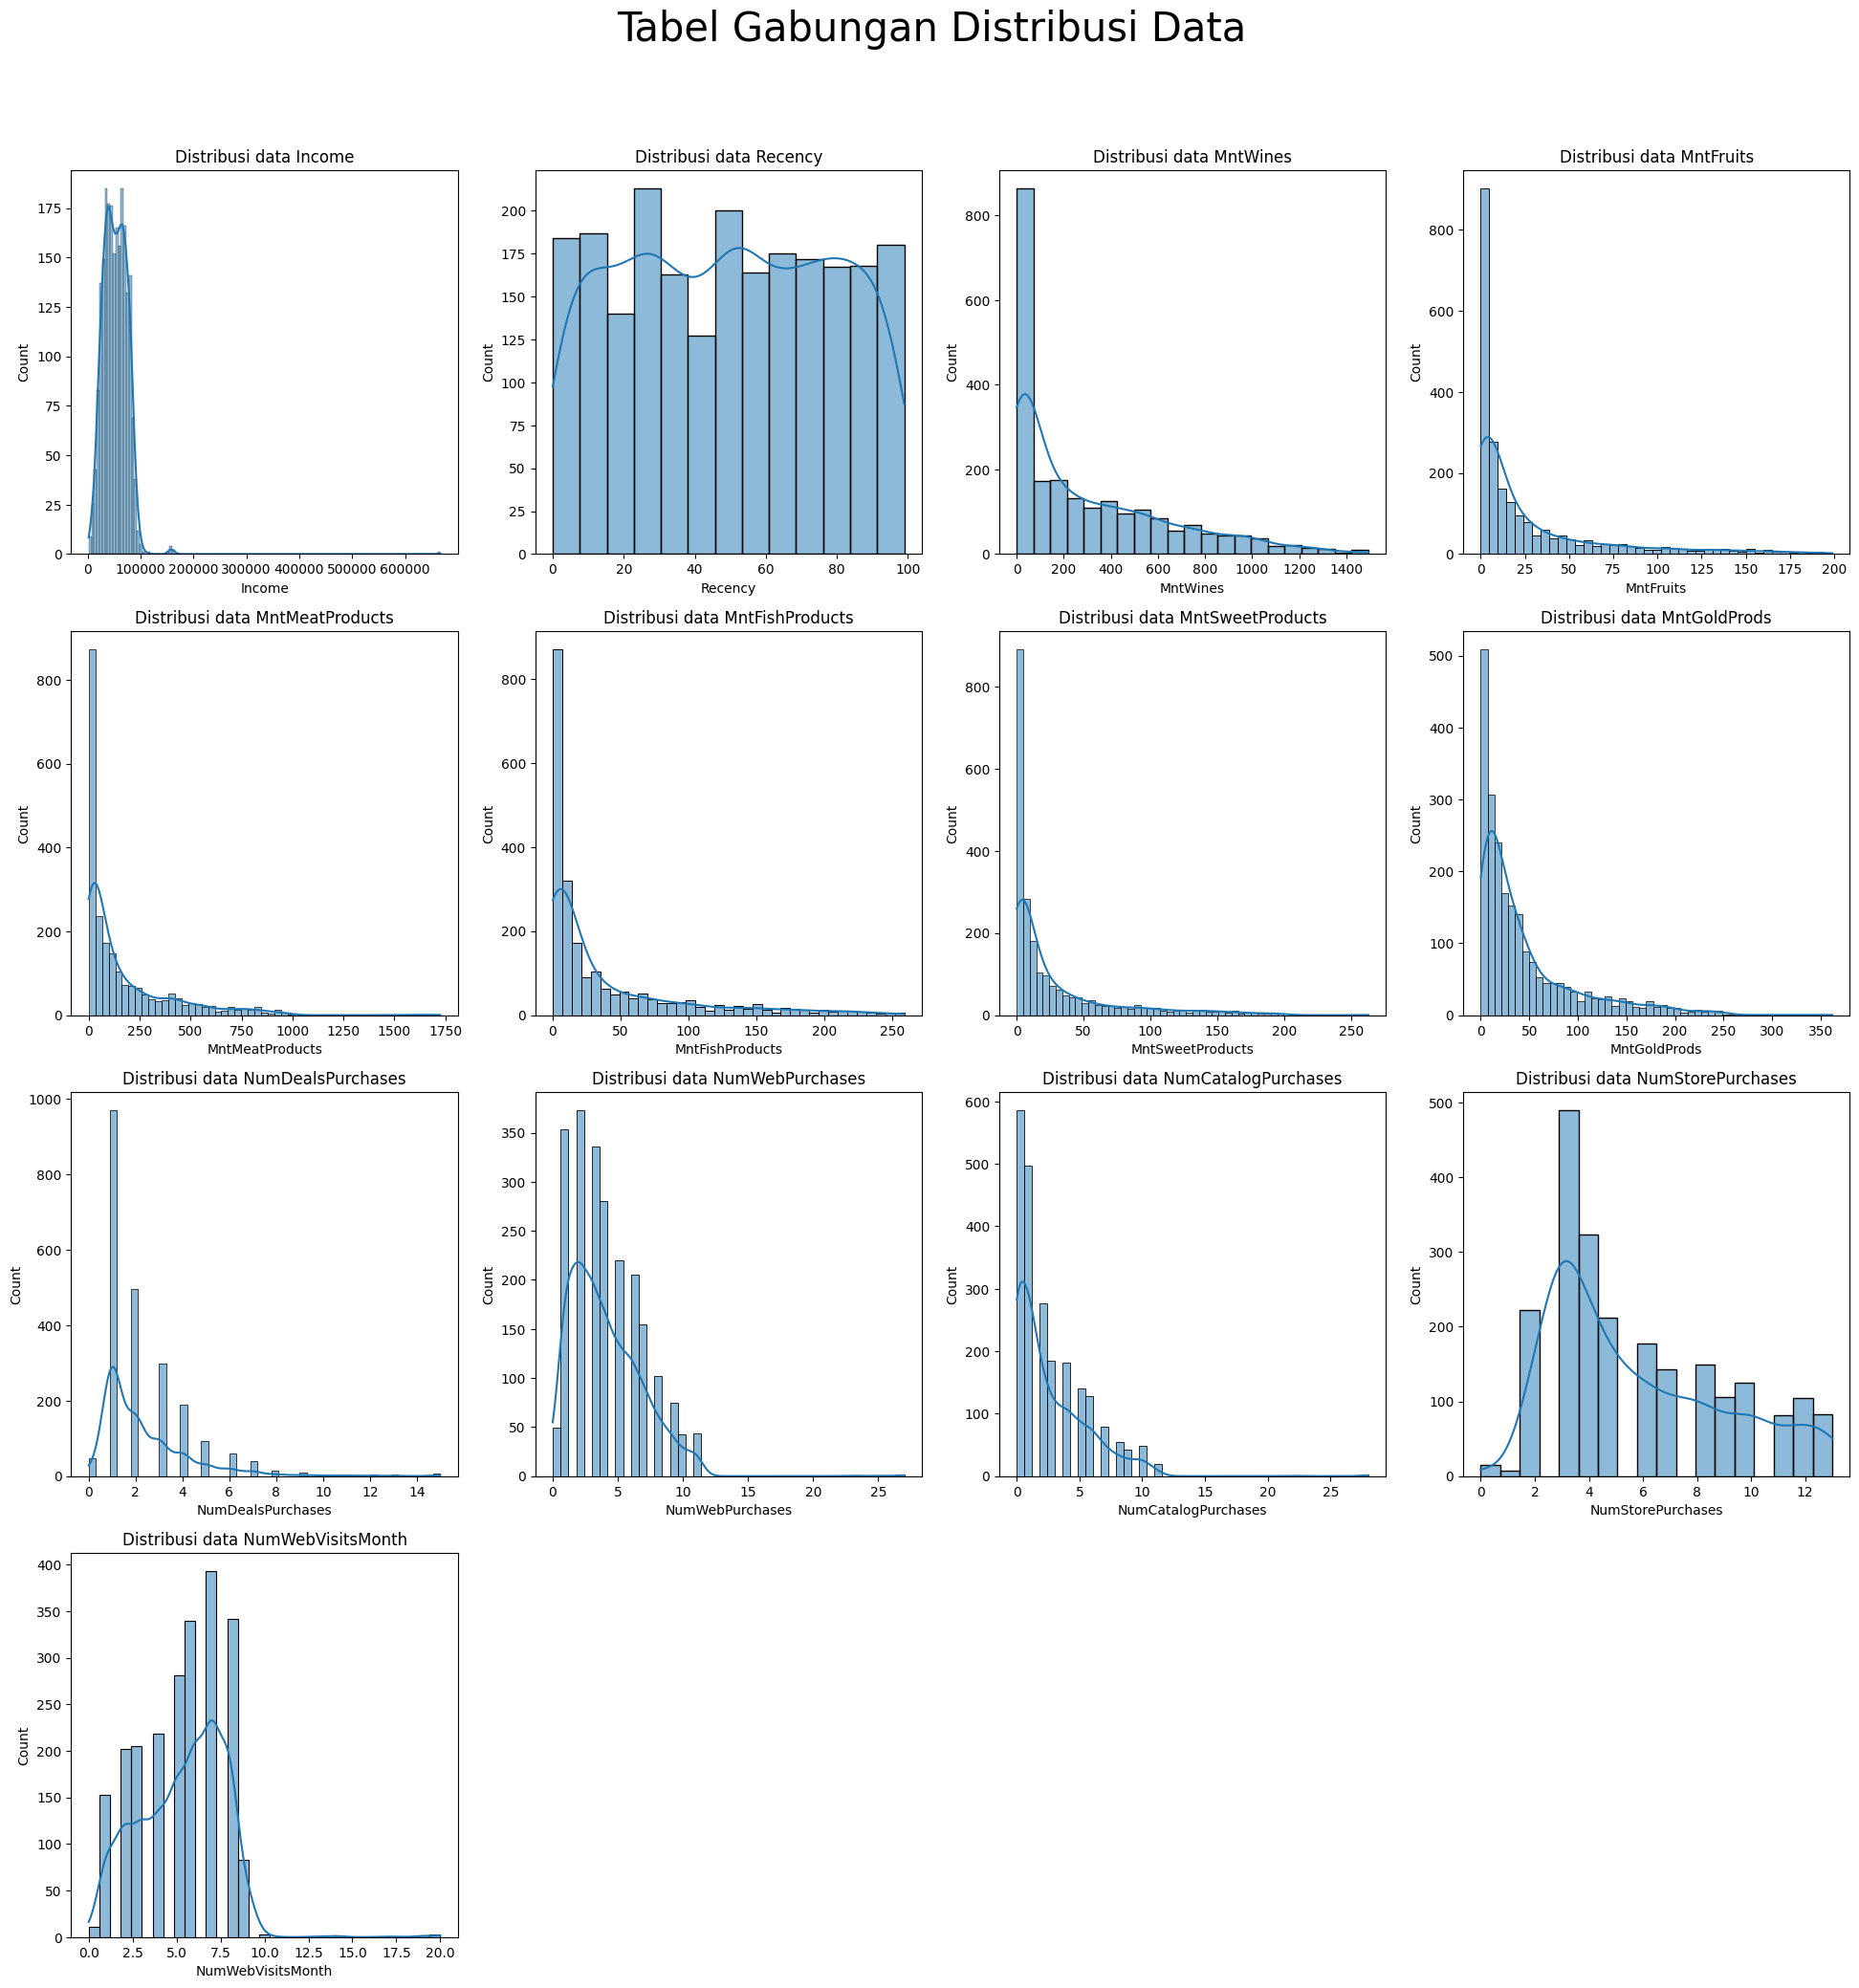

In [191]:
# membuat list kolom yang akan dilihat distribusi datanya dengan histplot
listKolom = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(24,24))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom==13 : # karena hanya ada 13 data, maka akan dibreak ketika kolom==13
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
          
            sns.histplot(data=df, x=listKolom[kolom], kde=True)
            plt.title(f'Distribusi data {listKolom[kolom]}')
            kolom+=1

plt.suptitle('Tabel Gabungan Distribusi Data', size=30, y=0.95)
plt.show()

**Insight**

- Untuk mengecek distribusi data maka dilakukan penampilan bentuk grafik dari distribusi data yang ada.
- Dari gambar-gambar grafik diatas kita bisa mengambil kesimpulan bahwa data yang ada **TIDAK** terdistribusi normal dikarenakan bentuk grafiknya tidak berbentuk lonceng sempurna. Tetapi grafik-Grafik diatas membentuk *right skew*, maka kita dapat mengisi *missing value* dengan menggunakan *median*.


In [192]:
df['Income'] = df['Income'].fillna(value=df.groupby('Education')['Income'].transform('median'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [193]:
stat, pvalue = shapiro(df['Income'])

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


**Insight**

- Setelah mengisi *missing value* di kolom `Income`, kita dapat mengecek dengan jelas distribusi datanya.
- Dari hasil percobaan statistik distribusi data `Income` diatas, kita bisa membuktikan bahwa data TIDAK terdistribusi normal dengan pvalue lebih kecil dari 0.05.

***Merubah type data `Dt_Customer` yang dari `object` menjadi `Datetime64[ns]`***

In [194]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

***Merubah beberapa isi data yang ada di kolom `Marital_Status`***

In [195]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [196]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Kita akan melakukan perubahan status customer yang ada di kolom `Marital_Status` dan `Education` sehingga mempermudah kita dalam melakukan analisis data

***`Marital_Status`***

In [197]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow       77 
Alone       3  
Absurd      2  
YOLO        2  
Name: count, dtype: int64

In [198]:
def nikah(isi):
    if isi == 'Alone':  
        return 'Single'
    elif isi == 'Absurd':
        return 'Single'
    elif isi == 'YOLO':
        return 'Single'
    elif isi == 'Widow':
        return 'Divorced'
    elif isi == 'Married':
        return 'Together'
    elif isi == 'Together':
        return 'Married'
    elif isi == 'Divorced':
        return 'Divorced'
    else:
        return 'Single'

In [199]:
df['Marital_Status']=df['Marital_Status'].apply(nikah)

In [200]:
df['Marital_Status'].value_counts()

Marital_Status
Together    864
Married     580
Single      487
Divorced    309
Name: count, dtype: int64

***`Education`***

In [201]:
df['Education'].value_counts()

Education
Graduation    1127
PhD           486 
Master        370 
2n Cycle      203 
Basic         54  
Name: count, dtype: int64

In [202]:
def edukasi(input):
    if input == '2n Cycle':  
        return 'Master'
    elif input == 'Basic':
        return 'Non Graduate'
    elif input == 'Graduation':
        return 'Graduation'
    elif input == 'Master':
        return 'Master'
    else:
        return 'PhD'

In [203]:
df['Education']=df['Education'].apply(edukasi)

In [204]:
df['Education'].value_counts()

Education
Graduation      1127
Master          573 
PhD             486 
Non Graduate    54  
Name: count, dtype: int64

Drop kolom `Z_CostContact` dan `Z_Revenue`

Di kolom `Z_CostConttact` dan `Z_Revenue` berisikan angka unik yang sama untuk tiap barisnya, sehingga tidak relevan atau tidak ada pengaruh dalam analisis dan bisa dihapus saja.

In [205]:
df=df.drop(['Z_CostContact','Z_Revenue'], axis=1)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

**Membuat kolom kategori baru**

In [206]:
df['Total_Spend']=df['MntWines']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntFishProducts']
df['Total_Spend']

0       1617
1       27  
2       776 
3       53  
4       422 
       ...  
2235    1341
2236    444 
2237    1241
2238    843 
2239    172 
Name: Total_Spend, Length: 2240, dtype: int64

In [207]:
df['Age']=df['Year_Birth'].apply(lambda x: 2014-x)
df['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

In [208]:
df['Age'].min(), df['Age'].max()

(18, 121)

In [209]:
def jarakusia(input):
    if  input <=20:  
        return '17-20'
    elif 21<= input <=30:
        return '21-30'
    elif 31<= input <=40:
        return '31-40'
    elif 41<= input <=50:
        return '41-50'
    elif 51<= input <=60:
        return '51-60'
    elif 61<= input <=70:
        return '61-70'
    elif 71<= input <=80:
        return '71-80'
    elif 81<= input <=90:
        return '81-90'
    else:
        return '98+'

In [210]:
df['Age_Range']=df['Age'].apply(jarakusia)

In [211]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Divorced':'Alone', 'Single':'Alone'})

In [212]:
df['Childrens']=df['Kidhome']+df['Teenhome']

In [213]:
df['Family_Size'] = df['Living_With'].replace({'Alone':1, 'Partner':2}) + df['Childrens']

In [214]:
df['Campaign']=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()

### **Data yang sudah bersih**

Kita sudah selesai melakukan pembersihan data, mari kita lihat sekilas informasi dari data yang sudah dibersihkan.

In [215]:
pd.set_option('display.max_colwidth',1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,4,"[Graduation, PhD, Master, Non Graduate]"
3,Marital_Status,4,"[Single, Married, Together, Divorced]"
4,Income,1976,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52028.5, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 55212.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 46805.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 50943.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-04-09 00:00:00, 2014-08-03 00:00:00, 2013-08-21 00:00:00, 2014-10-02 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-08-05 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-03-11 00:00:00, 2012-08-08 00:00:00, 2013-06-01 00:00:00, 2012-12-23 00:00:00, 2014-11-01 00:00:00, 2013-03-18 00:00:00, 2013-02-01 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-11-05 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-02-09 00:00:00, 2014-11-02 00:00:00, 2013-01-02 00:00:00, 2013-04-29 00:00:00, 2013-12-03 00:00:00, 2013-05-11 00:00:00, 2013-02-10 00:00:00, 2014-06-28 00:00:00, 2012-09-11 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-08-11 00:00:00, 2014-12-05 00:00:00, 2012-11-08 00:00:00, 2014-07-06 00:00:00, 2013-12-06 00:00:00, 2012-11-19 00:00:00, 2013-02-04 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-04-07 00:00:00, 2012-07-09 00:00:00, 2013-02-18 00:00:00, 2013-11-06 00:00:00, 2013-06-12 00:00:00, 2013-05-21 00:00:00, 2014-11-05 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-08-04 00:00:00, 2012-11-09 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-05-04 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-12-10 00:00:00, 2013-04-09 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-03-07 00:00:00, 2014-02-25 00:00:00, 2013-11-08 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-11-04 00:00:00, 2013-01-12 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00

Sebelum dibersihkan kita memiliki 2240 baris data dan 29 kolom. Kita membuang 2 kolom dan menambah sekitar 6 kolom baru, dan sisa data yang kosong diisi dengan data yang dirasa relevan.

# **Data Analysis**

kita sudah melakukan tahap *data cleaning*, sekarang kita bisa memulai analisis untuk mengetahui **konsumen behaviour**

Kita membuat DataFrame baru dengan cara di groupby berdasarkan `ID`, `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProdutcs`, `MntSweetProducts` dan `MntGoldProds` agar kita bsa mengecek korelasi yang ada didalam data tersebut.

In [216]:
df1=df.groupby(df['ID'])[['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spend']].median()
df1.reset_index()

,ID,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spend
0,0,70951.0,239.0,10.0,554.0,254.0,87.0,54.0,1198.0
1,1,57091.0,464.0,5.0,64.0,7.0,0.0,37.0,577.0
2,9,46098.0,57.0,0.0,27.0,0.0,0.0,36.0,120.0
3,13,25358.0,19.0,0.0,5.0,0.0,0.0,8.0,32.0
4,17,60491.0,637.0,47.0,237.0,12.0,19.0,76.0,1028.0
...,...,...,...,...,...,...,...,...,...
2235,11178,42394.0,15.0,2.0,10.0,0.0,1.0,4.0,32.0
2236,11181,156924.0,2.0,1.0,2.0,1.0,1.0,1.0,8.0
2237,11187,26487.0,2.0,8.0,10.0,12.0,14.0,23.0,69.0
2238,11188,26091.0,15.0,10.0,19.0,8.0,17.0,20.0,89.0


In [217]:
df1corr=df1.corr(method='spearman')
df1corr

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spend
Income,1.000000,0.827321,0.579043,0.812690,0.574195,0.563788,0.503387,0.847018
MntWines,0.827321,1.000000,0.517544,0.823652,0.524609,0.505322,0.575345,0.927003
MntFruits,0.579043,0.517544,1.000000,0.713169,0.705016,0.691356,0.568750,0.682386
MntMeatProducts,0.812690,0.823652,0.713169,1.000000,0.726242,0.695704,0.637912,0.939382
MntFishProducts,0.574195,0.524609,0.705016,0.726242,1.000000,0.700871,0.565283,0.695620
MntSweetProducts,0.563788,0.505322,0.691356,0.695704,0.700871,1.000000,0.542963,0.670111
MntGoldProds,0.503387,0.575345,0.568750,0.637912,0.565283,0.542963,1.000000,0.692576
Total_Spend,0.847018,0.927003,0.682386,0.939382,0.695620,0.670111,0.692576,1.000000


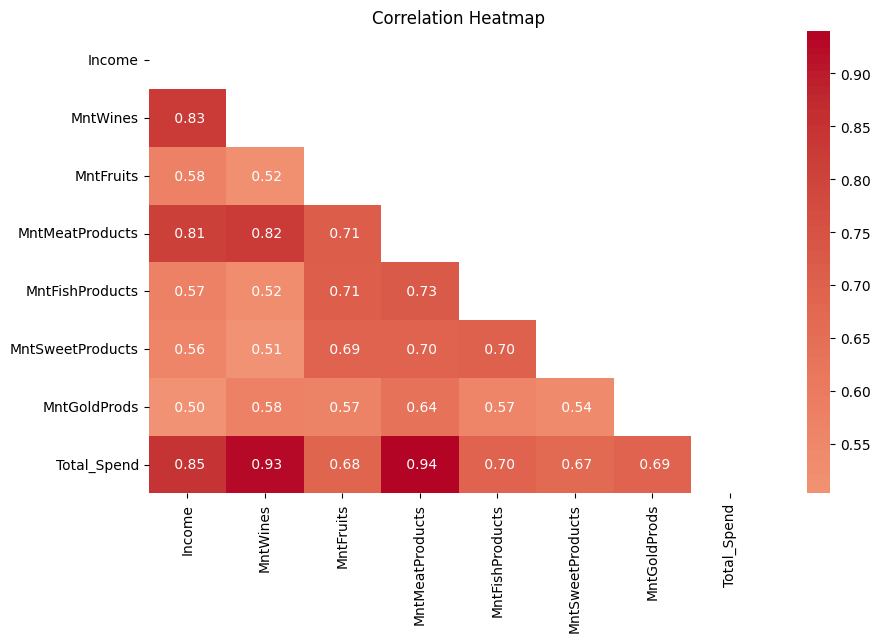

In [218]:
matriks = np.triu(df1corr)
matriks

plt.figure(figsize=(10,6))
sns.heatmap(data=df1corr,fmt= ' .2f', annot=True, cmap='coolwarm', center=0, mask=matriks)

plt.title('Correlation Heatmap')
plt.show()

**Insight**

- Warna gelap menunjukkan korelasi yang semakin kuat.
-Warna merah gelap menunjukkan hubungan yang positif, semakin gelap maka hubungannnya positif dan semakin kuat.
- Warna pucat menunjukkan hubungan korelasi semakin lemah.
- `Income` dan `MntMeatProducts` menunjukkan hubungan *`Strong Positive`*, semakin tinggi Income maka semakin tinggi daya beli `MntMeatProducts`. 
- `Income` dan `MntGoldProds` menunjukkan hubungan weak positive, semakin kecil `Income` semakin kecil daya beli `MntGoldProds`. 


In [219]:
nama_kolom=['Marital_Status', 'Education', 'Age_Range']
nama_kolom

['Marital_Status', 'Education', 'Age_Range']

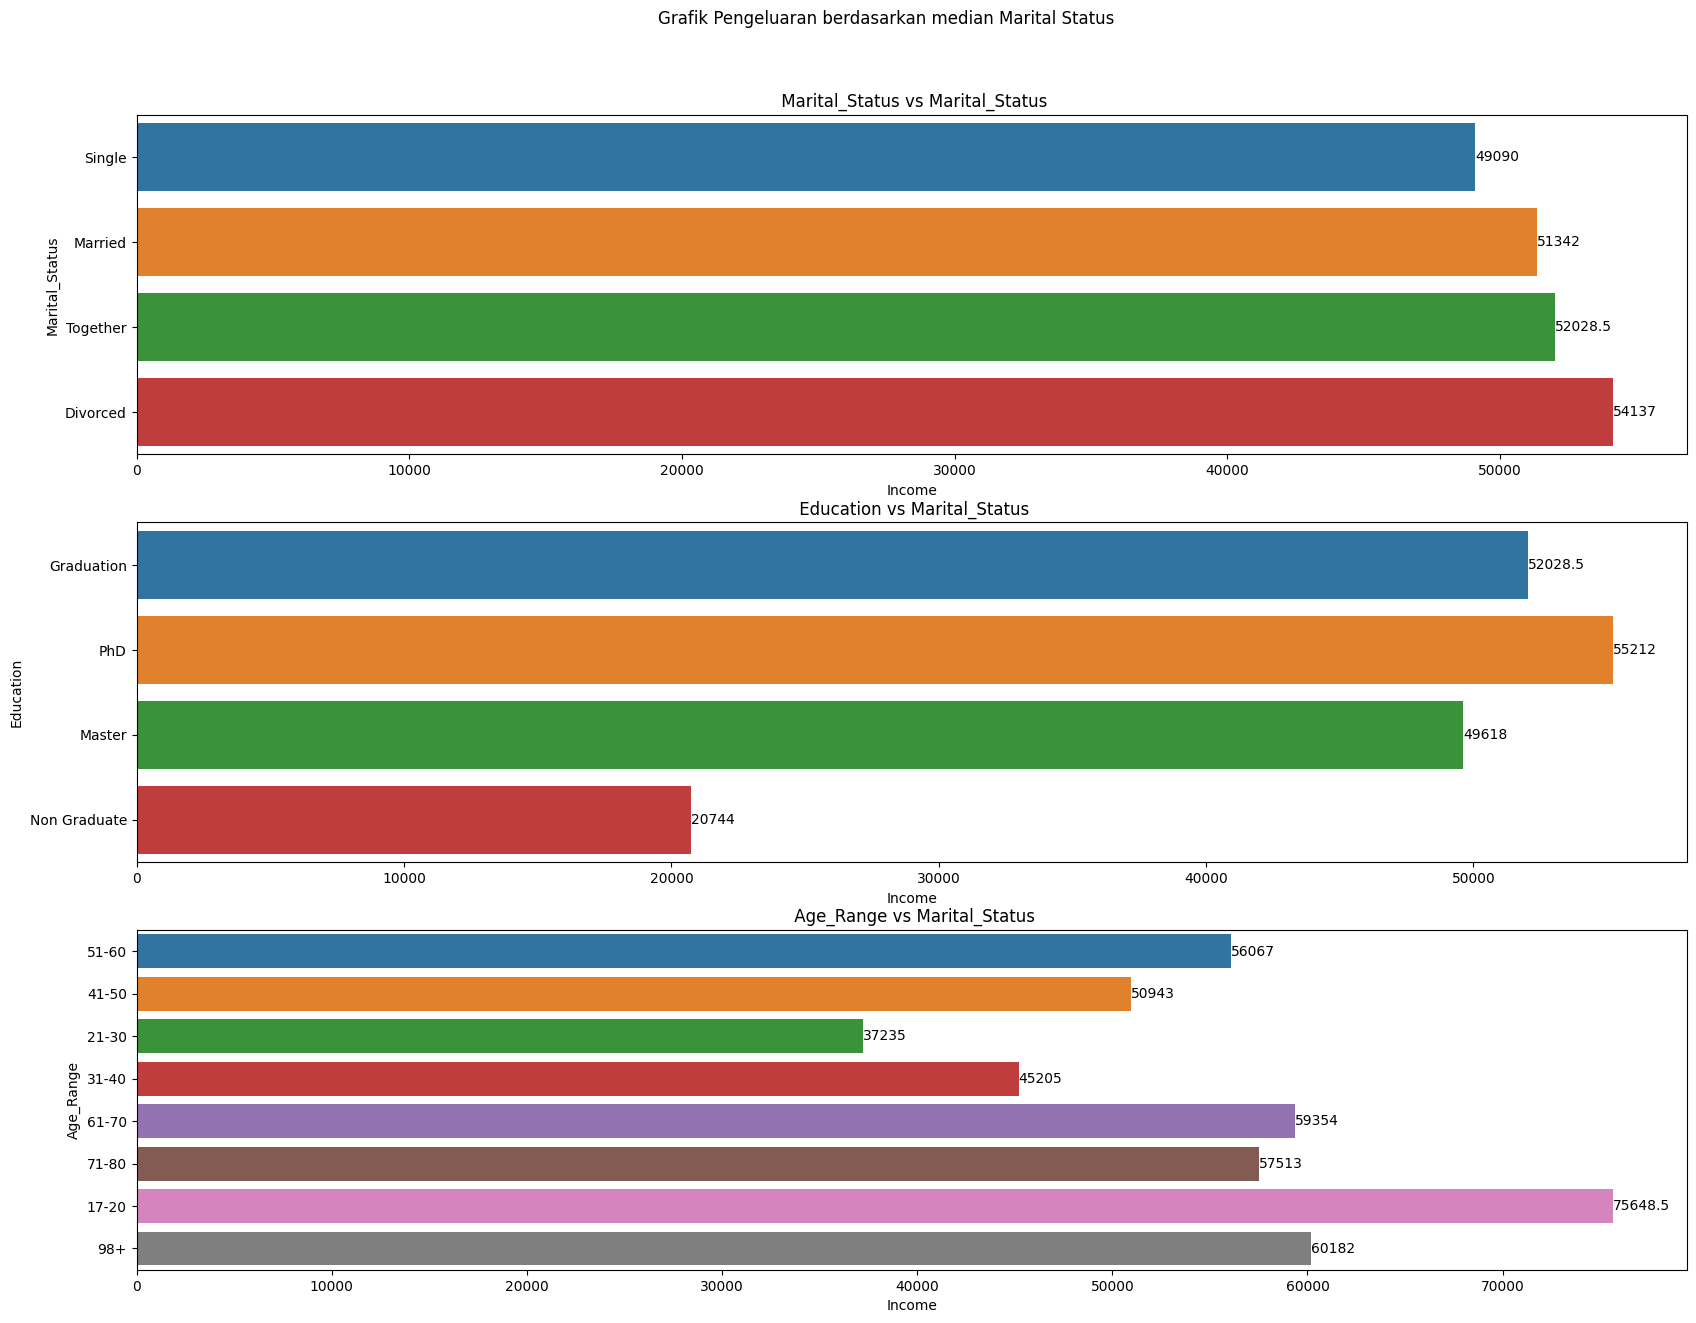

In [220]:
id = 0
n_rows = 3
n_cols = 1
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Income', y = nama_kolom[id], ci=0, estimator='median')
        plt.title(f' {nama_kolom[id]} vs Marital_Status')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Pengeluaran berdasarkan median Marital Status", y=0.95)
plt.show()

**Insight**

- Berdasarkan `Marital_Status` **Divorced** memiliki penghasilan yang paling besar sedangkan yang terkecil berada di **Single**, dimungkinkan karena divorced mempunyai tanggungan terhadap keluarganya dibandingkan yang berstatus single.
- Untuk `Education` kita dapat melihat posisi tertinggi ada di **PhD** dan yang terendah berada di **Non Graduate**, disini kita bisa melihat bahwa semakin tinggi pendidikan semakin besar juga penghasilannya.
- Untuk `Age_Range` disini kita bisa melihat bahwa yang tertinggi berada di rentang usia **17-20** dan yang terendah berada di rentang usia **21-30**, akan tetapi dengan usia sangat muda mempunyai penghasilan yang sangat besar maka saya menyimpulkan yang rentang usia **17-20** ini berasal dari keluarga yang kaya.

<Axes: xlabel='Total_Spend', ylabel='Income'>

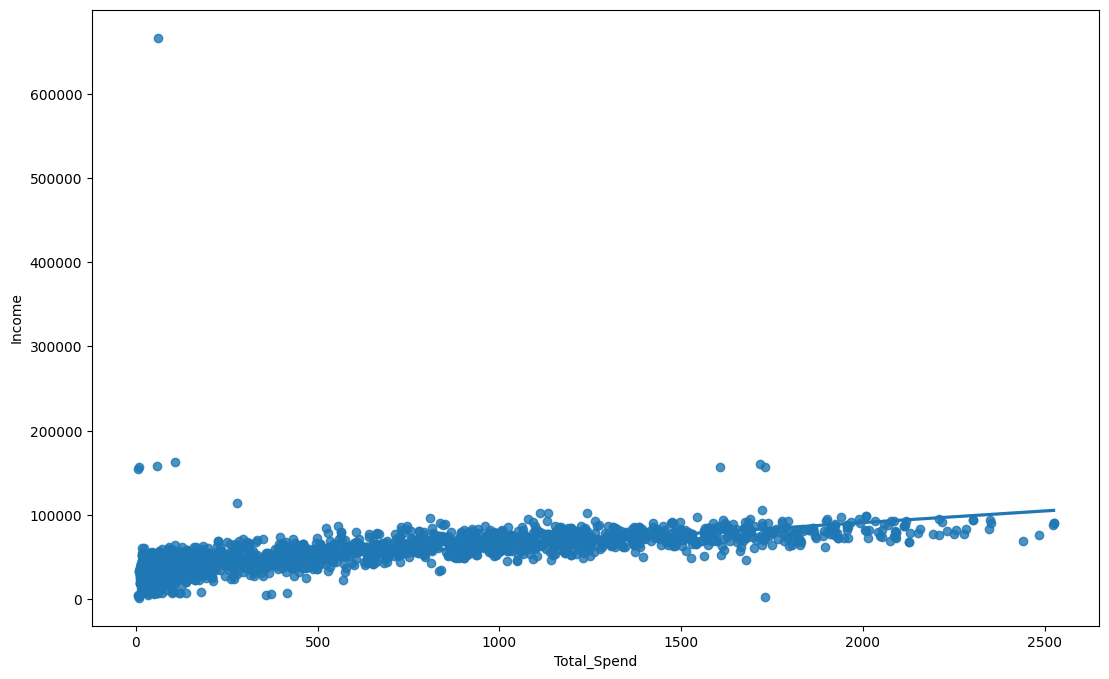

In [221]:
plt.figure(figsize=(13,8))
sns.regplot(data= df,x='Total_Spend', y='Income')

**Insight**

- Distribusi data antara `Income` dan `Total Spend` cukup bagus akan tetapi tidak terdistribusi dengan normal
- `Income` dan `Total Spend` menunjukkan korelasi yang kuat, semakin besar pendapatan maka besar juga dalam pengeluaran.
- Dari data grafik di atas kita dapat menyimpulkan ada kemungkinan daya beli yang kuat dari konsumen

In [223]:
list_column = ['MntWines', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts','MntGoldProds']
list_column

['MntWines',
 'MntFruits',
 'MntFishProducts',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntGoldProds']

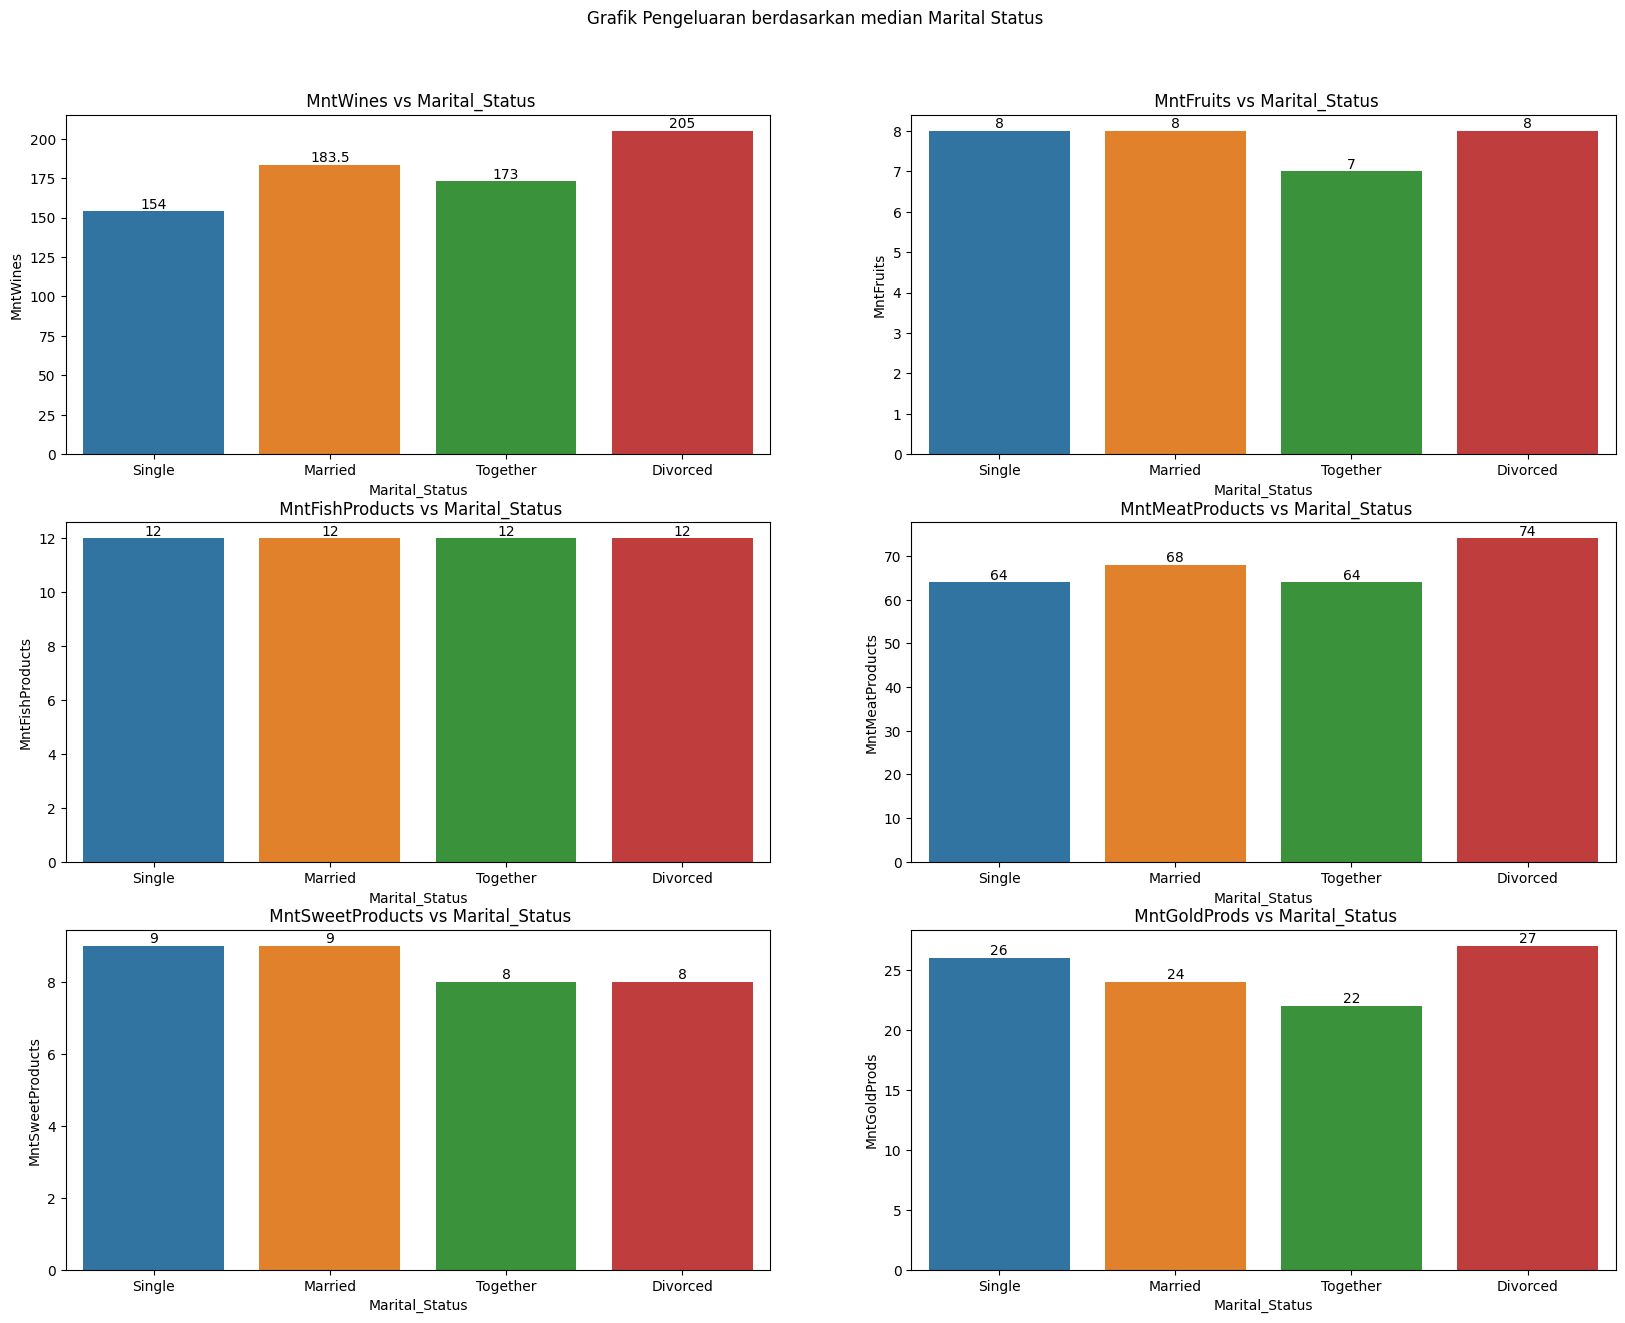

In [224]:

id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Marital_Status', y = list_column[id], ci=0, estimator='median')
        plt.title(f' {list_column[id]} vs Marital_Status')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Pengeluaran berdasarkan median Marital Status", y=0.95)
plt.show()

**Insight**

- Untuk produk `MntWines` dapat dilihat bahwa pembelian tertinggi adalah konsumen yang sudah **divorced dengan nilai median 205** dikarenakan adanya pengaruh lingkungan keluarga yang tidak baik.
- Dan yang terkecil pembelian `MntWines`adalah konsumen yang **single dengan nilai median 154** diasumsikan sebagai gaya pola hidup saja.
- Untuk produk `MntFruits` kita dapat melihat bahwa **Single, Married dan Divorced** memiliki pola hidup sehat, mereka memiliki score yang sama yaitu **8**, sedangkan yang **together** memiliki score median terkecil walau sangat tipis yaitu **7**.
- Untuk `MntFishProduct` tidak ada nilai median berbeda **Single, Married, Together dan Divorced** memiliki nilai median **12**, maka kita dapat simpulkan mempunyai daya beli yang sama.
- Untuk `MntMeatProducts` kita dapat melihat nilai median yang tertinggi adalah **Divorced** sebesar **74** dan yang terendah mediannya adalah **Single dan Together** sebesar **64**, maka kita dapat menyimpulkan bahwa pihak **Divorced** menyukai daging daripada yang lainnya.
- Untuk `MntSweetProducts` kita dapat melihat nilai median yang tertinggi adalah **Singel dan Married** sebesar **9**, sedangkan yang median terendah ada di **Together dan Divorced** sebesar **8**. Maka kita dapat menyimpulkan bahwa semua memiliki potensial dalam daya beli produk ini karena perbedaan yang sangat tipis.
- Untuk `MntGoldProds` kita dapat melihat nilai median tertinggi ada di **Divorced** sebesar **27** dan yang terendah ada di **Together** sebesar **22**, maka dapat kita simpulkan bahwa yang sendiri dapat menabung lebih besar daripada yang sudah berpasangan.

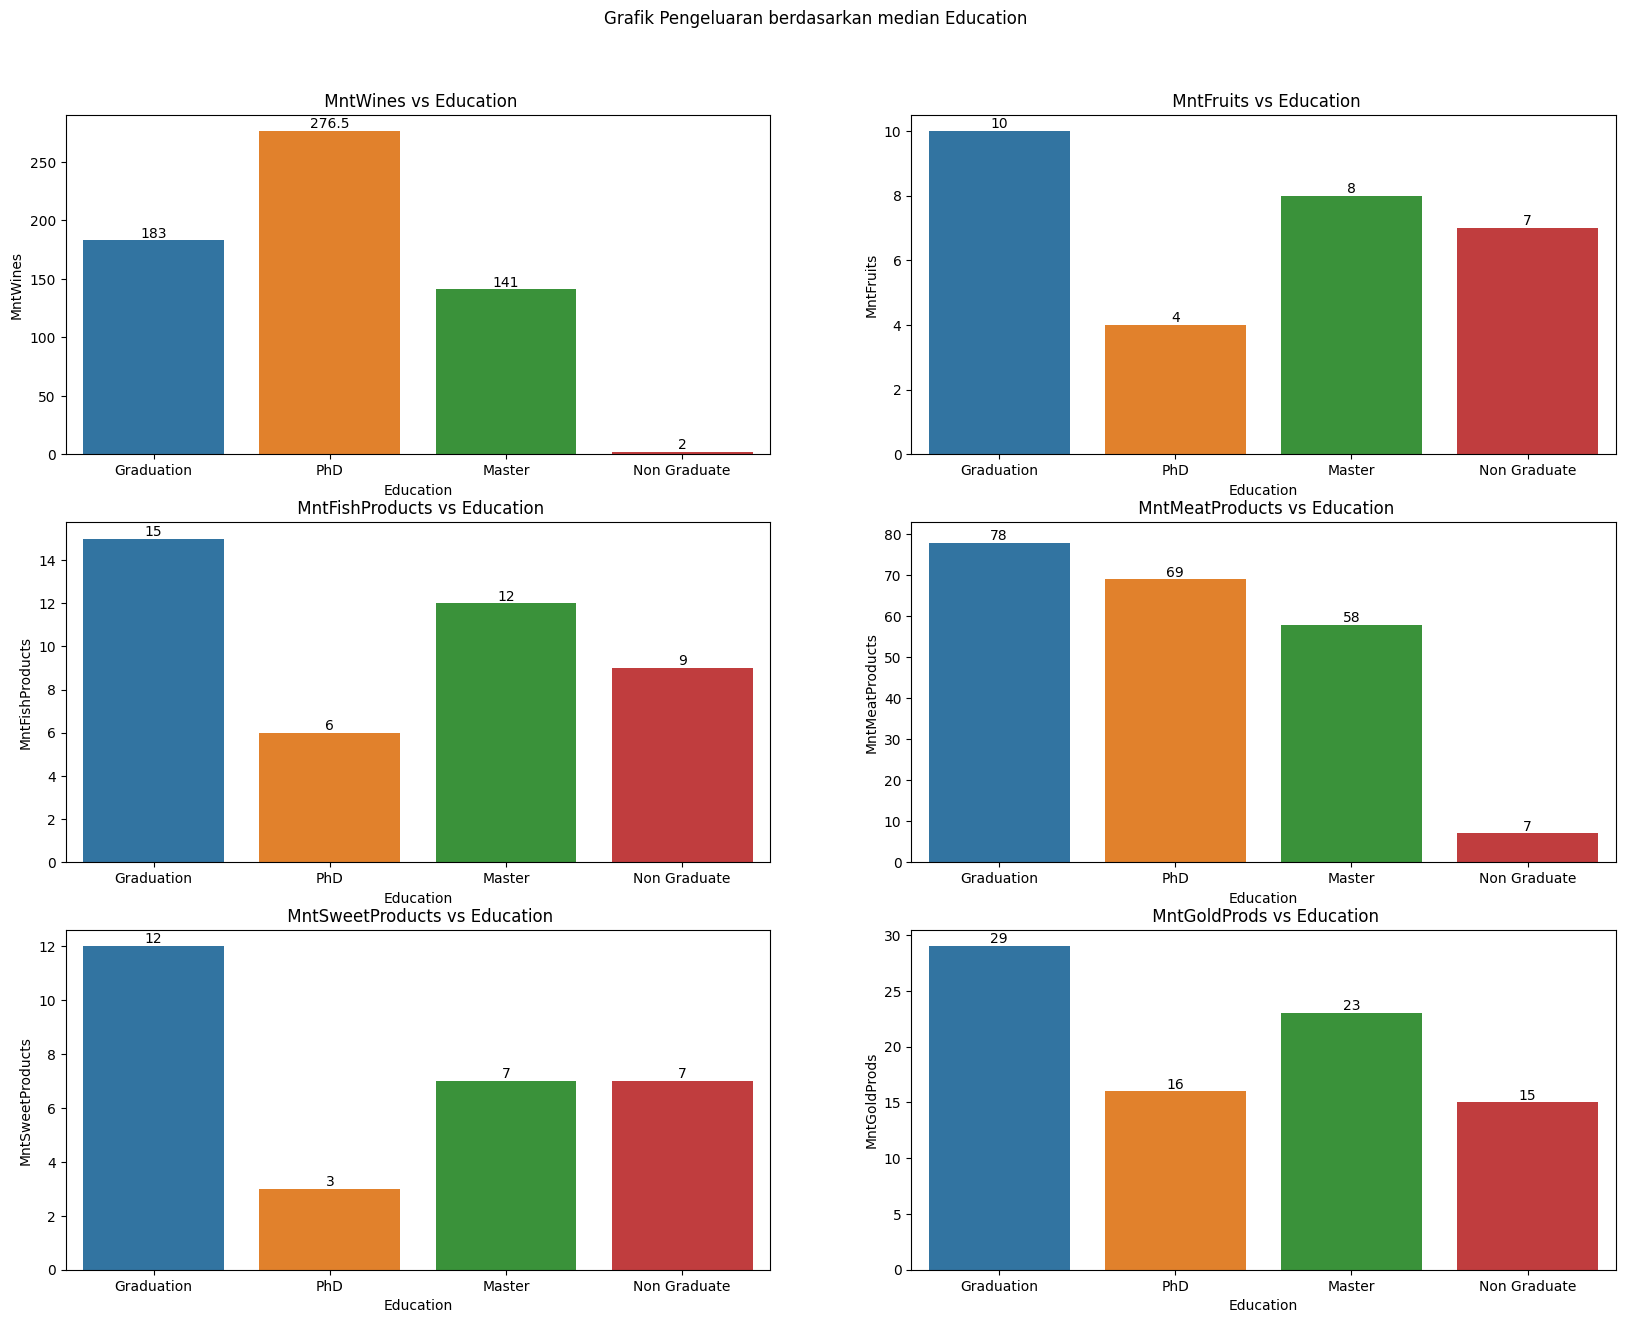

In [225]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Education', y = list_column[id], ci=0, estimator='median')
        plt.title(f' {list_column[id]} vs Education')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Pengeluaran berdasarkan median Education", y=0.95)
plt.show()

**Insight**

- Untuk `MntWines` kita bisa melihat bahwa **PhD** memiliki daya beli yang tinggi dan yang rendah ada di **Non Graduate**, hal ini dapat kita simpulkan semakin tinggi pendidikan semakin kuat daya beli produk ini.
- untuk `MntFruits` kita bisa melihat bahwa **Graduate** memiliki daya beli yang tinggi dan yang terendah ada di **PhD**, hal ini dapat kita simpulkan bahwa **Graduate, Master dan Non Graduate** memiliki daya beli baik daripada **PhD**.
- Untuk `MntFishProducts` kita bisa melihat bahwa **Graduate** memiliki daya beli yang lebih tinggi jika dibandingkan yang lainnya, dan daya beli terendah ada di **PhD**.
- Untuk `MntMeatProducts` kita bisa melihat bahwa **Graduate** memiliki daya beli yang lebih tinggi jika dibandingkan yang lainnya, dan daya beli terendah ada di **Non Graduate**.
- Untuk `MntSweetProducts` kita bisa melihat bahwa **Graduate** memiliki daya beli yang lebih tinggi jika dibandingkan yang lainnya, dan daya beli terendah ada di **PhD**.
-Untuk `MntGoldProds` disini kita bisa melihat bahwa **Graduate** memiliki daya beli yang lebih tinggi jika dibandingkan yang lainnya, dan daya beli terendah ada di **PhD**.

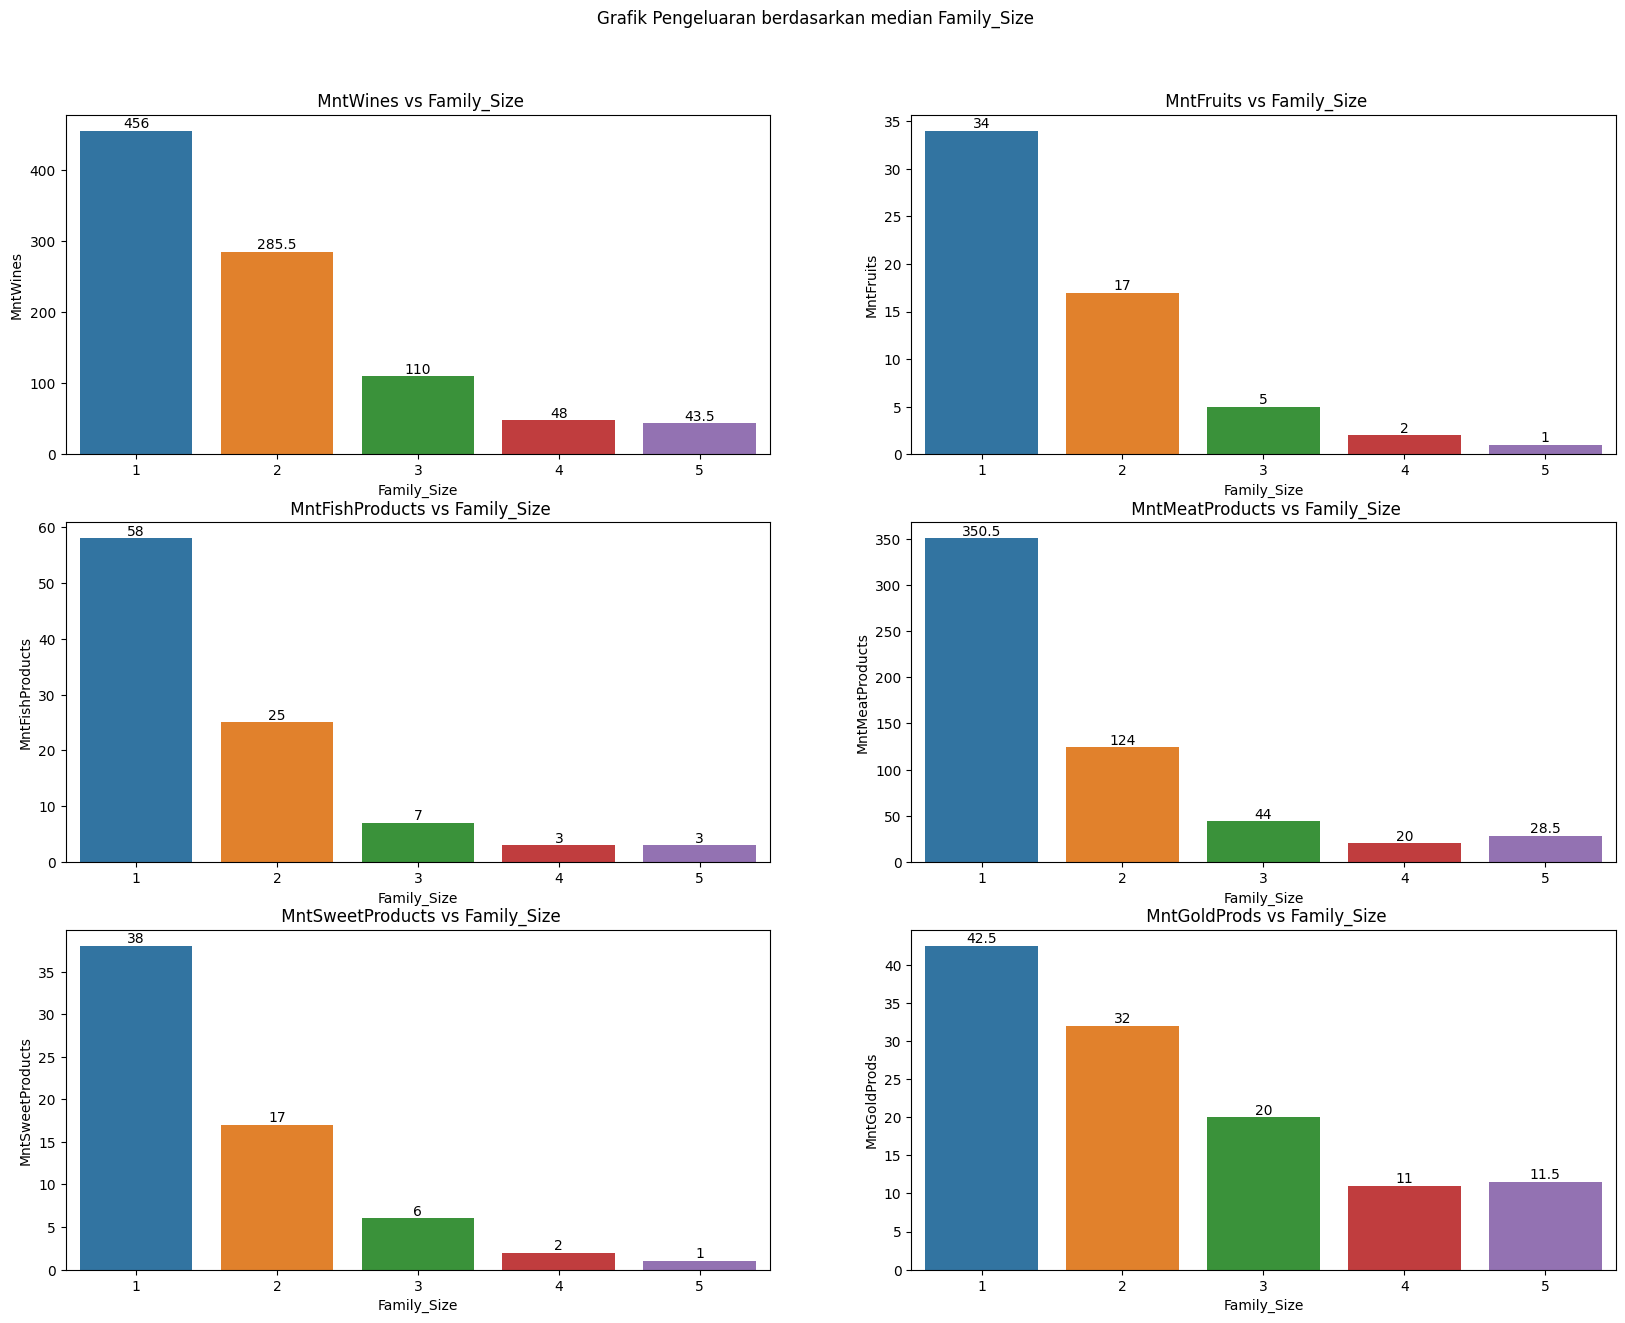

In [226]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Family_Size', y = list_column[id], ci=0, estimator='median')
        plt.title(f' {list_column[id]} vs Family_Size')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Pengeluaran berdasarkan median Family_Size", y=0.95)
plt.show()

**Insight**

- Dari grafik-grafik diatas bisa kita simpulkan bahwa **Single** memiliki daya beli yang bagus daripada yang lainnya, bisa disimpulkan **Single** mempunyai daya konsumtif yang tinggi. 
- Untuk `MntWines` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **5**.
- Untuk `MntFruits` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **5**.
- Untuk `MntFishProducts` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **4 dan 5**, mereka memiliki angka median yang sama yaitu **3**.
- Untuk `MntMeatProducts` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **4**.
- Untuk `MntSweetProducts` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **5**.
- Untuk `MntGoldProds` yang memiliki daya beli terendah di anggota keluarga yang berjumlah **4**.
- Dari data diatas bisa kita simpulkan bahwa semakin banyak anggota keluarga, maka semakin rendah daya konsumtif.

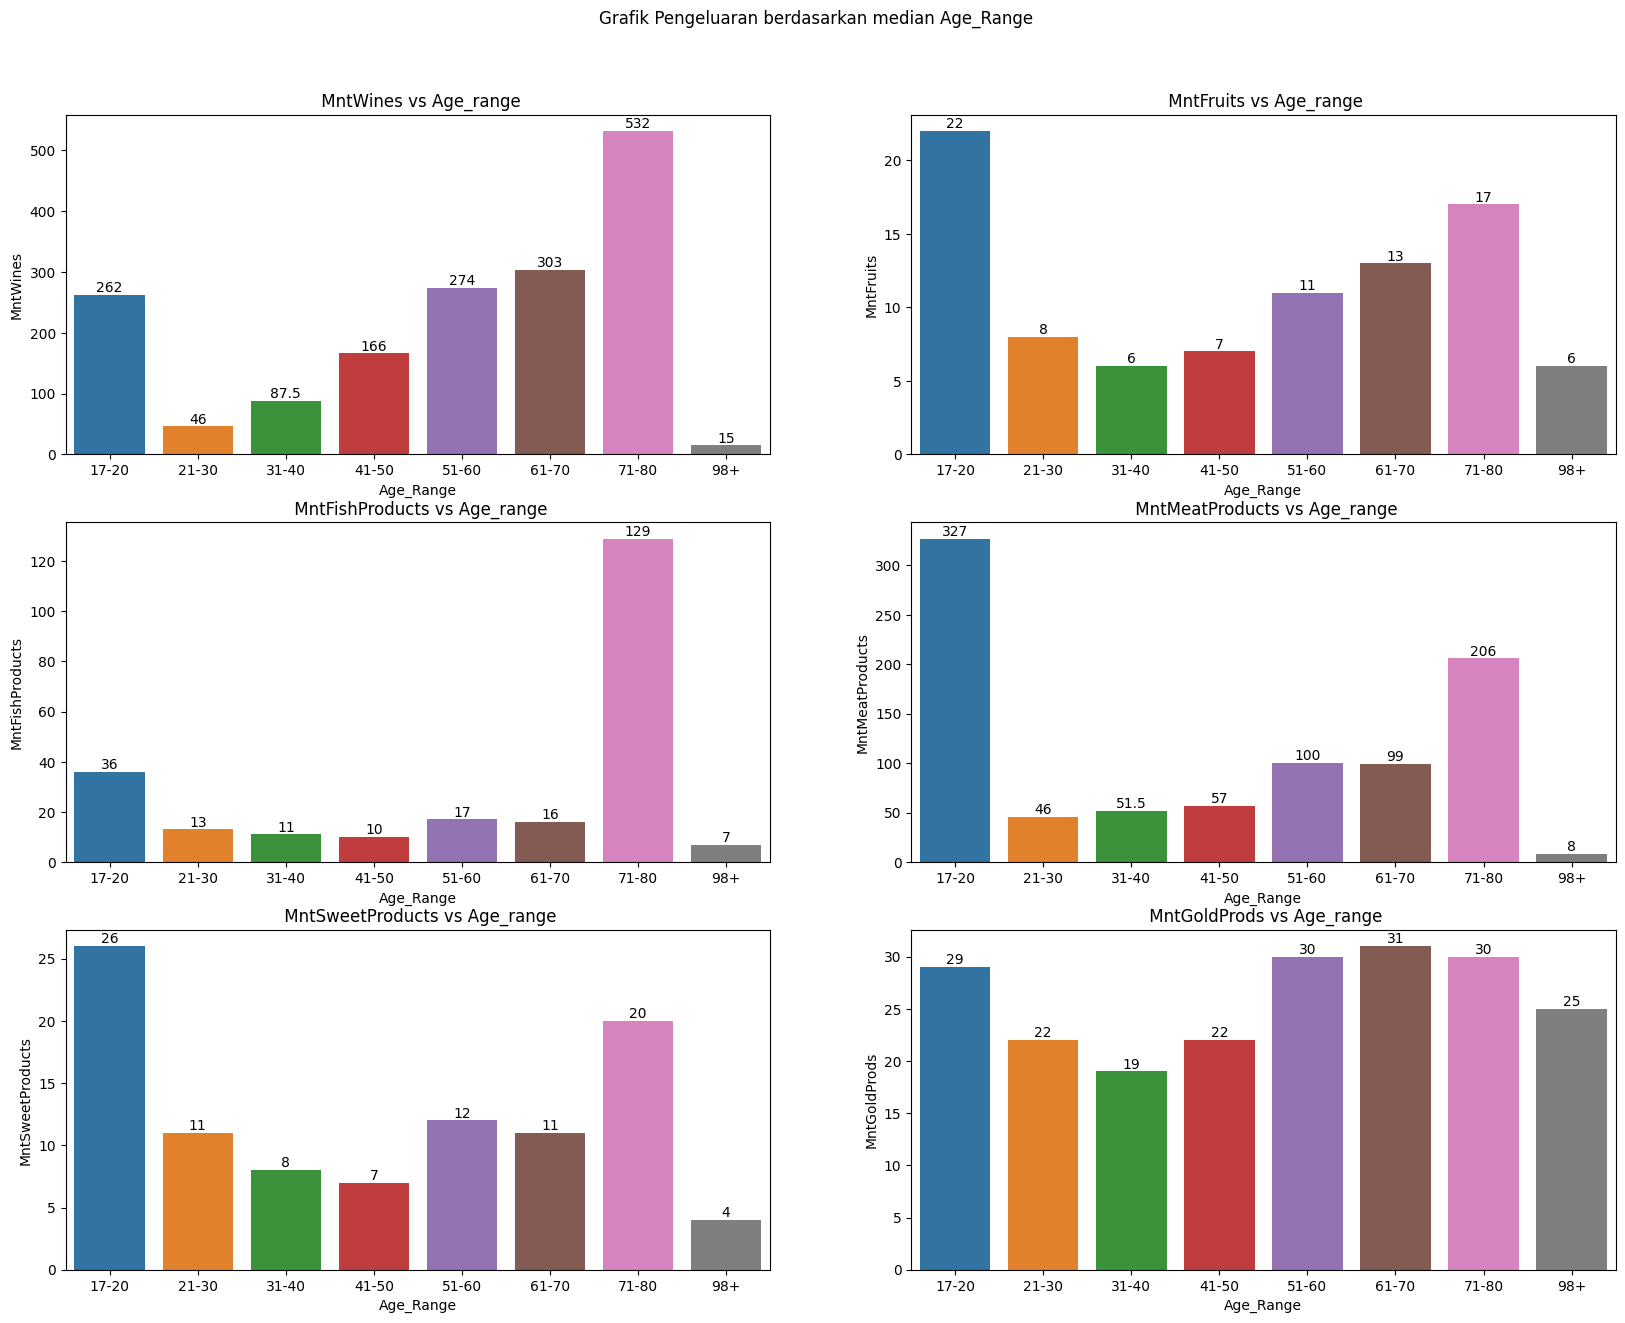

In [227]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x=df['Age_Range'].sort_values(), y = list_column[id], ci=0, estimator='median')
        plt.title(f' {list_column[id]} vs Age_range')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Pengeluaran berdasarkan median Age_Range", y=0.95)
plt.show()

**Insight**

- Untuk `MntWines` yang memiliki daya beli yang baik adalah rentang usia **71-80** dan yang memiliki daya beli yang rendah berada di rentang usia **98+**.
- Untuk `MntFruits` yang memiliki daya beli yang baik adalah rentang usia **17-20** dan yang memiliki daya beli yang rendah berada di rentang usia **31-40 dan 98+**.
- Untuk `MntFishProducts` yang memiliki daya beli yang baik adalah usia **71-80** dan yang memiliki daya beli yang rendah berada di rentang usia **98+**.
- Untuk `MntMeatProducts` yang memiliki daya beli yang baik adalah usia **17-20** dan yang memiliki daya beli yang rendah berada di rentang usia **98**.
- Untuk `MntSweetProducts` yang memiliki daya beli yang baik adalah usia **17-20** dan yang memiliki daya beli yang rendah berada di rentang usia **98+**.
- Untuk `MntGoldProds` yang memiliki daya beli yang baik adalah usia **61-70** dan yang memiliki daya beli yang rendah berada di rentang usia **31-40**.
- Dari data grafik-grafik diatas yang memiliki daya beli tinggi dikisaran rentang usia **17-20** dan yang memiliki daya beli rendah di keseluruhan produk ada di rentang usia **98+**.

# **Campaign yang ditawarkan**

In [228]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Spend', 'Age',
       'Age_Range', 'Living_With', 'Childrens', 'Family_Size', 'Campaign'],
      dtype='object')

In [229]:
list_column1= ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
list_column1

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [258]:
dfpromo=df.groupby(df['ID'])[['Total_Spend','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()
dfpromo.reset_index()
dfpromocorr= dfpromo.corr()

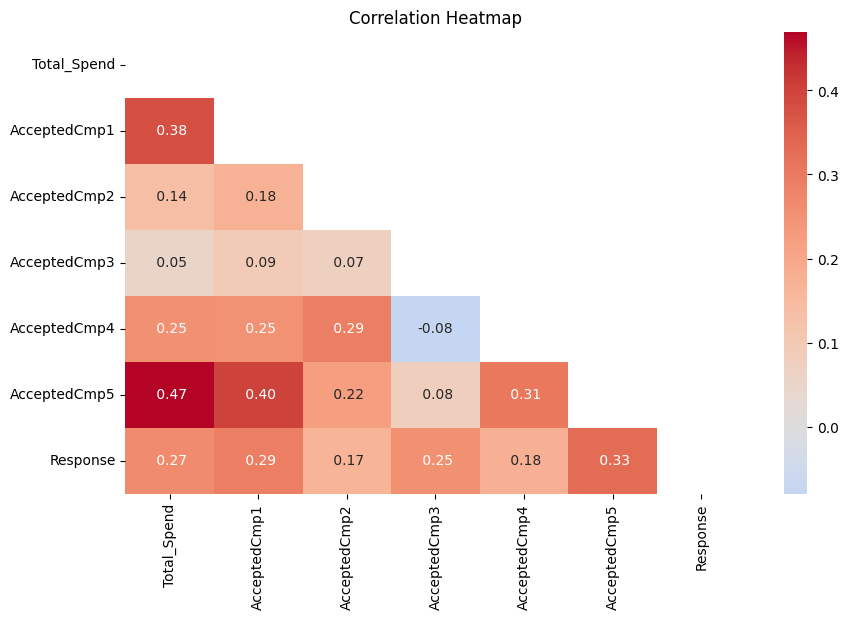

In [259]:
matriks = np.triu(dfpromocorr)
matriks

plt.figure(figsize=(10,6))
sns.heatmap(data=dfpromocorr,fmt= ' .2f', annot=True, cmap='coolwarm', center=0, mask=matriks)

plt.title('Correlation Heatmap')
plt.show()

**Insight**

- Warna gelap menunjukkan korelasi yang semakin kuat.
- Warna merah gelap menunjukkan hubungan yang positif, semakin gelap maka hubungannnya positif dan semakin kuat.
- Warna pucat menunjukkan hubungan korelasi semakin lemah.
- `AccepetdCmp5` dan `Total_Spend` menunjukkan hubungan *`weak Positive`*, semakin tinggi campaign yang dilakukan maka semakin besar `Total_Spend` konsumen. 
- `AcceptedCmp3` dan `AcceptedCmp4` menunjukkan hubungan weak negative, semakin sedikit campaign `AcceptedCmp3` yang dilakukan maka semakin kecil juga respon terhadap campaign `AcceptedCmp4`.

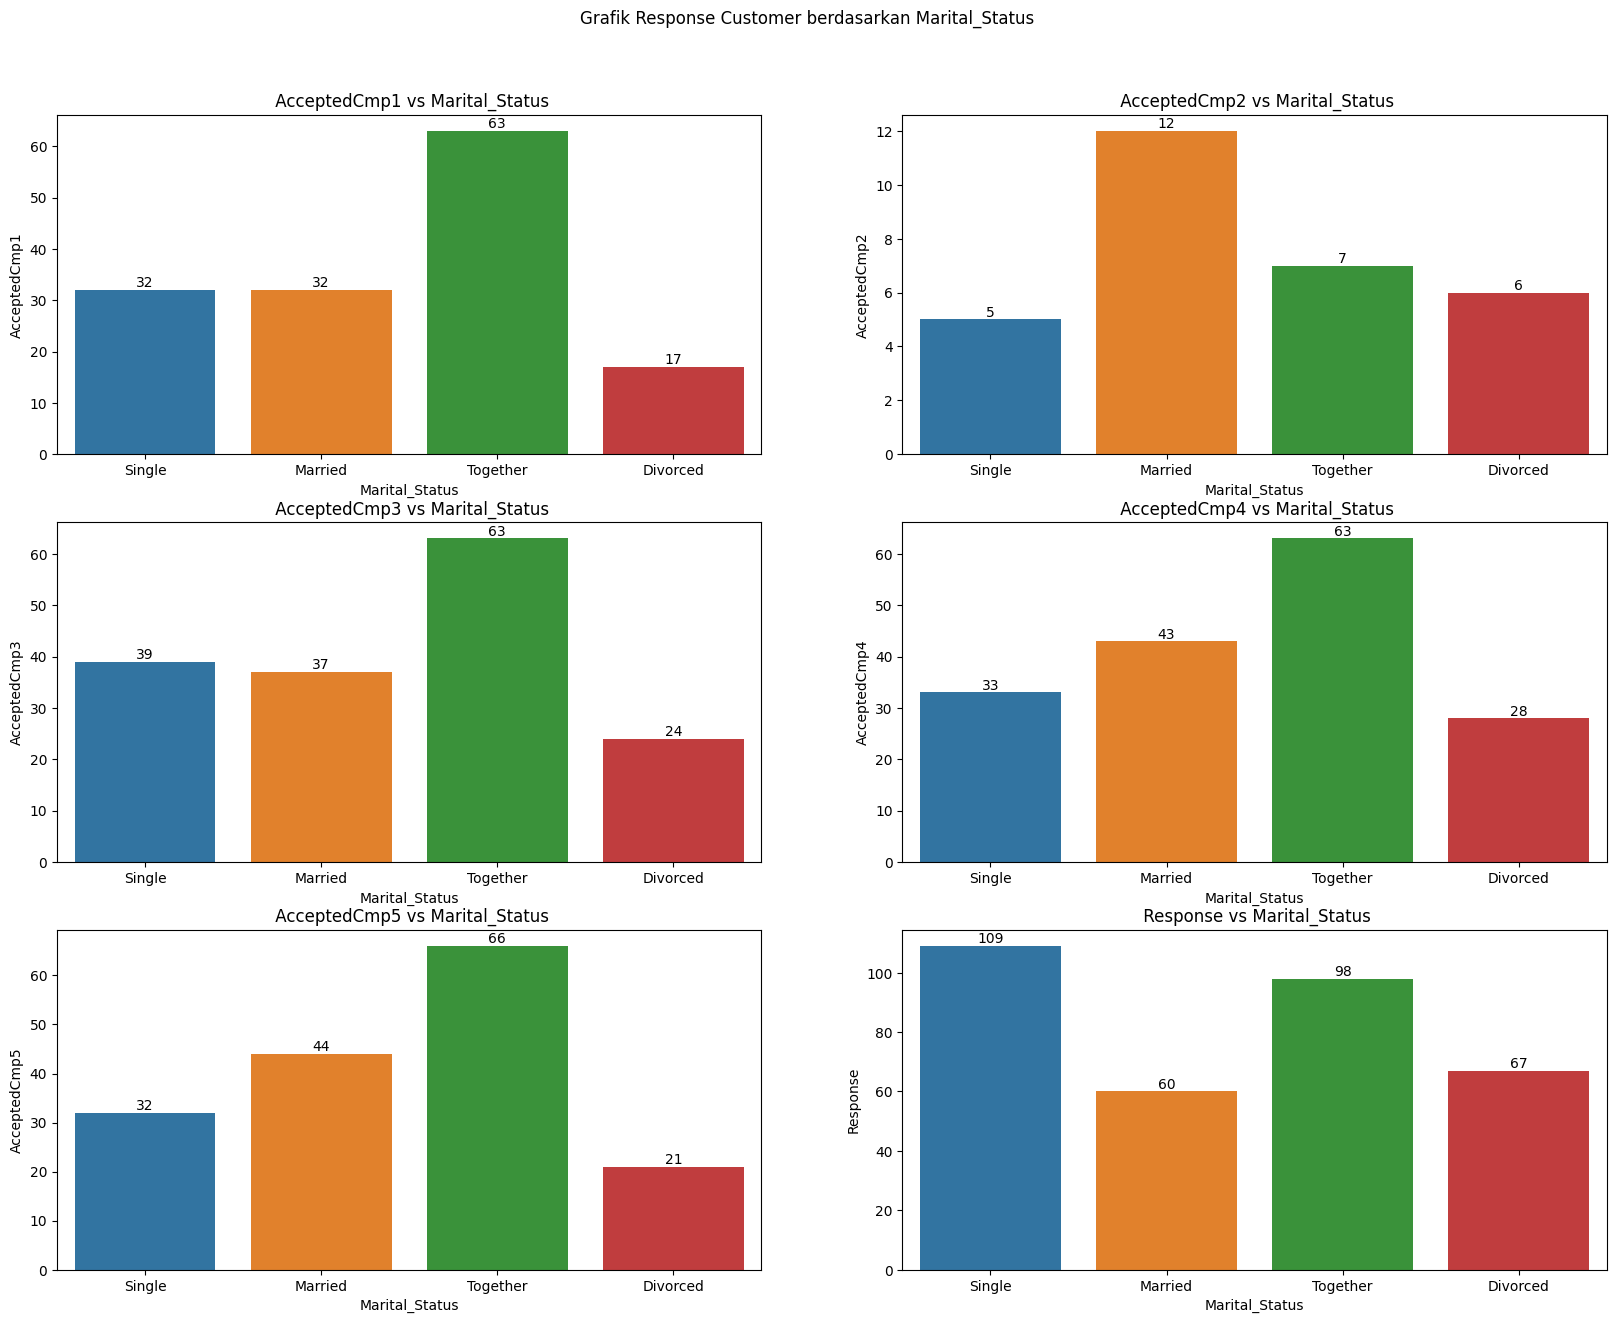

In [230]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Marital_Status', y = list_column1[id], ci=0, estimator=sum)
        plt.title(f' {list_column1[id]} vs Marital_Status')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Response Customer berdasarkan Marital_Status", y=0.95)
plt.show()

**Insight**

- Untuk `AcceptedCmp1` yang mengambil penawaran paling banyak berada di **Together** dan yang terendah berada di **Divorced**.
- Untuk `AcceptedCmp2` yang mengambil penawaran paling banyak berada di **Married** dan yang terendah berada di **Single**.
- Untuk `AcceptedCmp3` yang mengambil penawaran paling banyak berada di **Together** dan yang terendah berada **Divorced**.
- Untuk `AcceptedCmp4` yang mengambil penawaran paling banyak berada di **Together** dan yang terendah berada **Divorced**.
- Untuk `AcceptedCmp5` yang mengambil penawaran paling banyak berada di **Together** dan yang terendah berada **Divorced**.
- Untuk `Response` yang mengambil kesempatan promo diskon atau event tertinggi berada di **Single** dan yang terendah berada di **Married**.
- Dari Marital Status diatas kebanyakan yang mengambil kesempatan dalam penawaran adalah yang memiliki status berpasangan **Together dan Married** sedangkan yang sedikit mengambil adalah tidak berpasangan **Single dan Divorced**

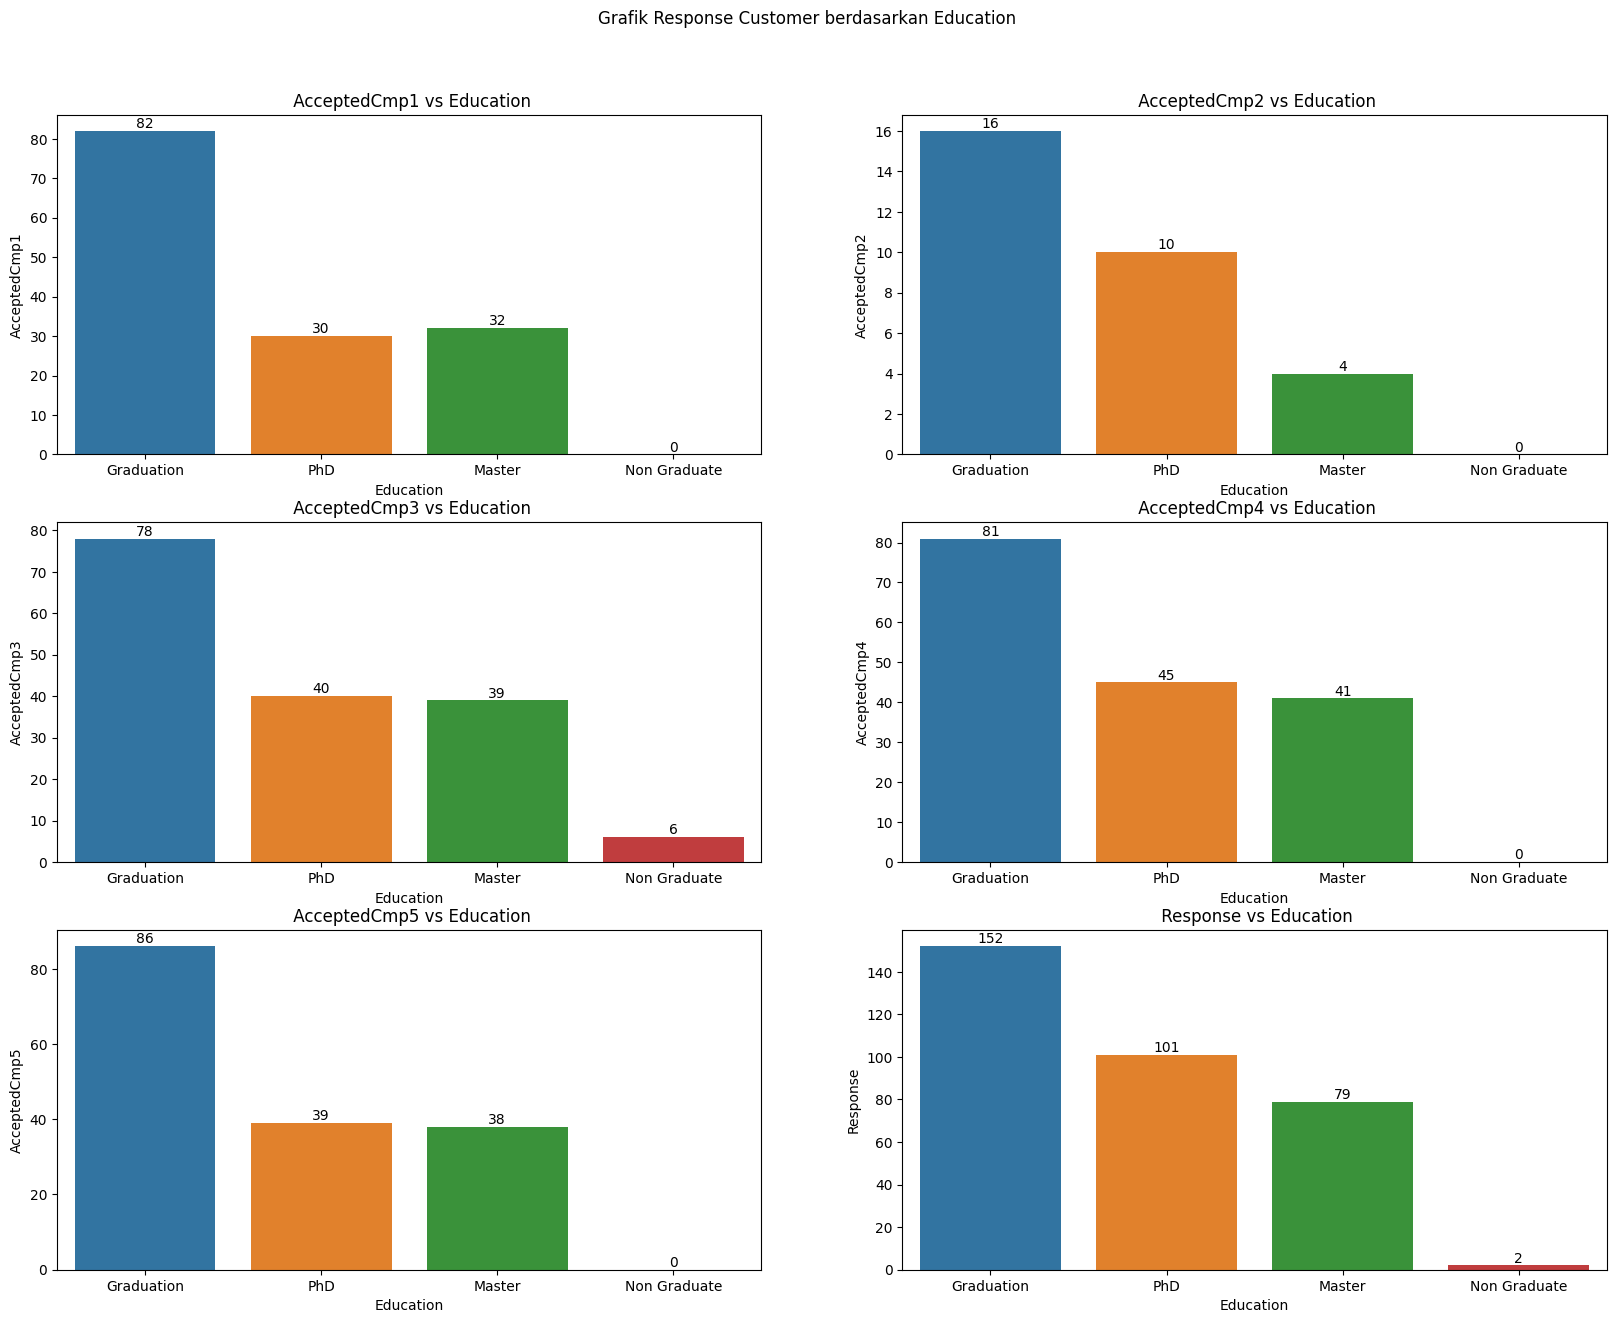

In [231]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Education', y = list_column1[id], ci=0, estimator=sum)
        plt.title(f' {list_column1[id]} vs Education')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Response Customer berdasarkan Education", y=0.95)
plt.show()

**Insight**

- Dari data kita bisa melihat bahwa daya beli tertinggi dengan promo yang ditawarkan berada di tingkat pendidikan **Graduation** dan yang sedikit adalah **Non graduate**

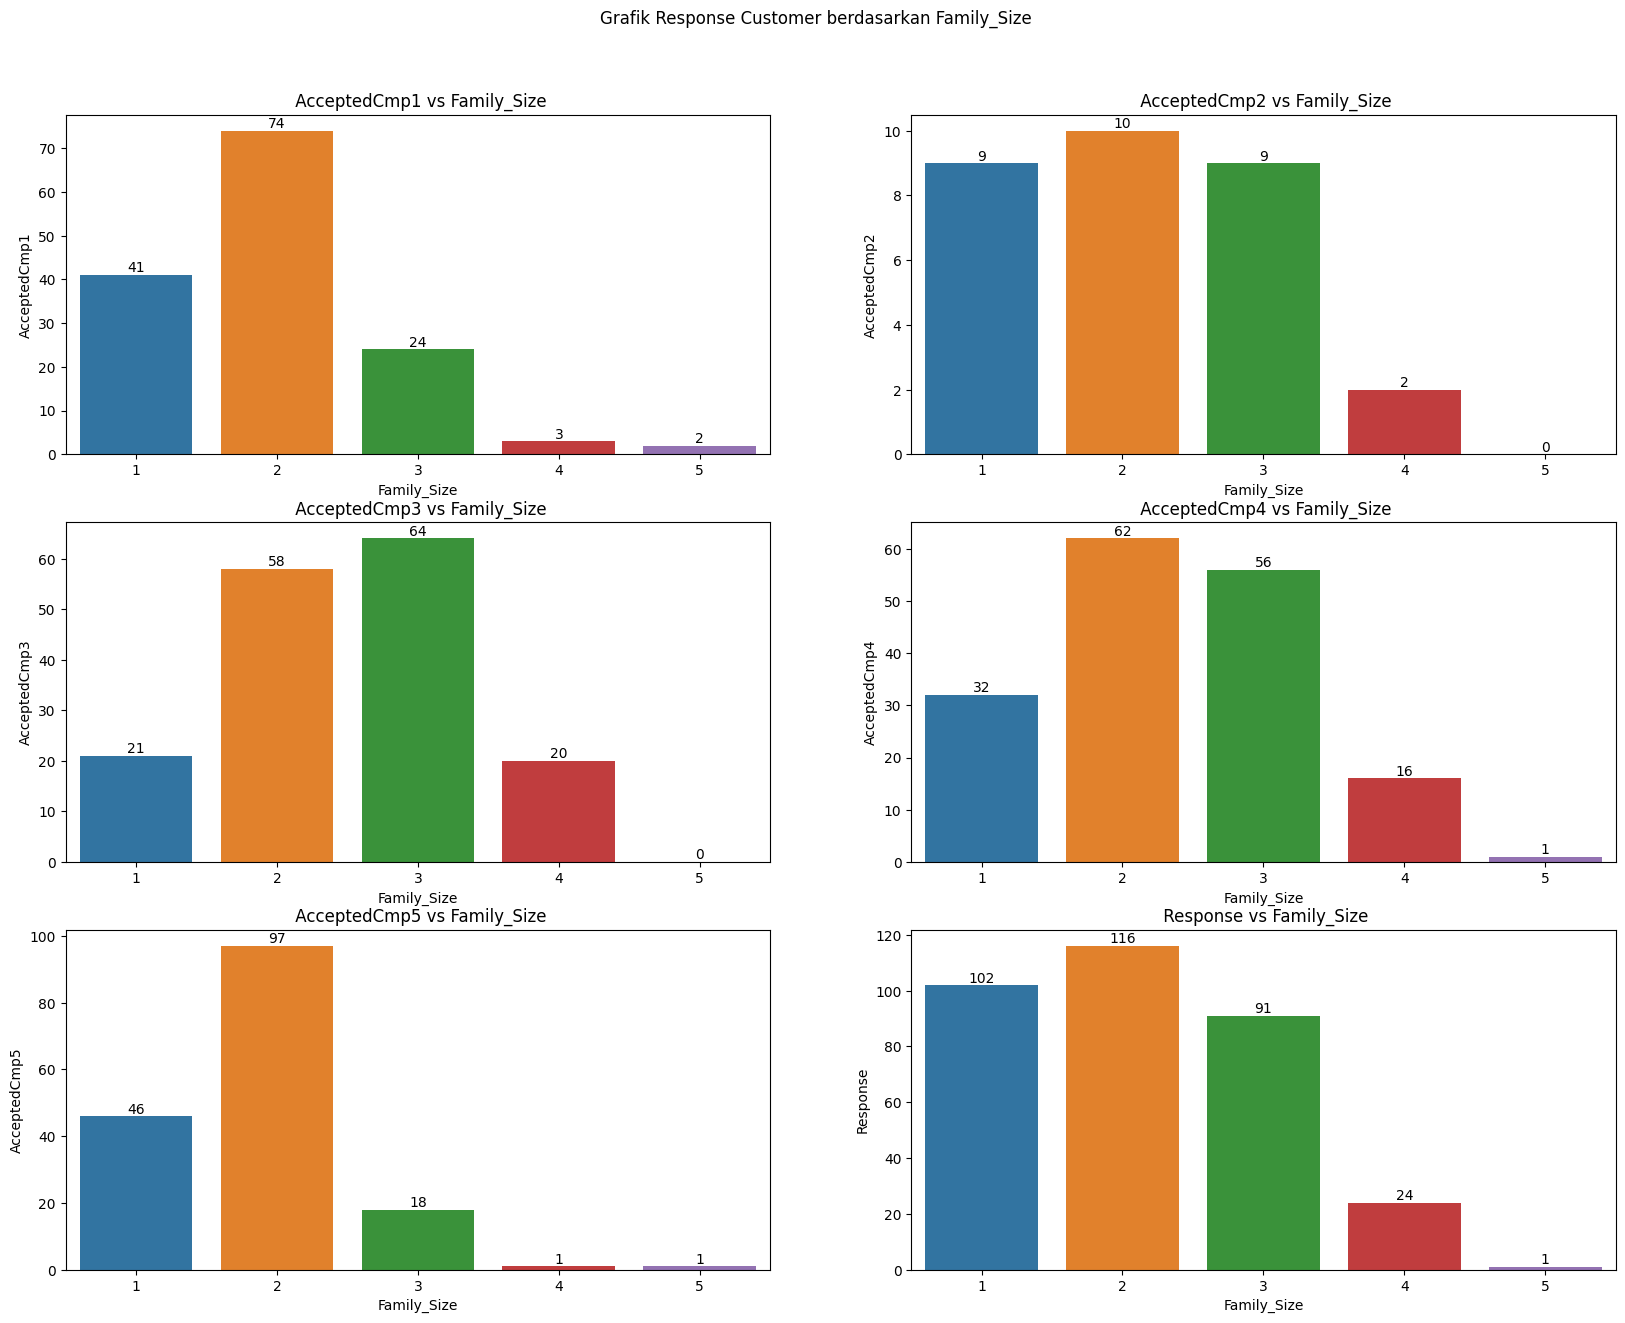

In [232]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Family_Size', y = list_column1[id], ci=0, estimator=sum)
        plt.title(f' {list_column1[id]} vs Family_Size')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Response Customer berdasarkan Family_Size", y=0.95)
plt.show()

**Insight**

- Dari data diatas kita bisa melihat bahwa jumlah anggota keluarga berpengaruh besar dalam pengambilan penawaran yang diberikan,semakin banyak anggota keluarga maka semakin kecil penawaran yang diambil.
- Dan  yang banyak mengambil penawaran berada di anggota keluarga yang berjumlah lebih kecil sama dengan **3**.


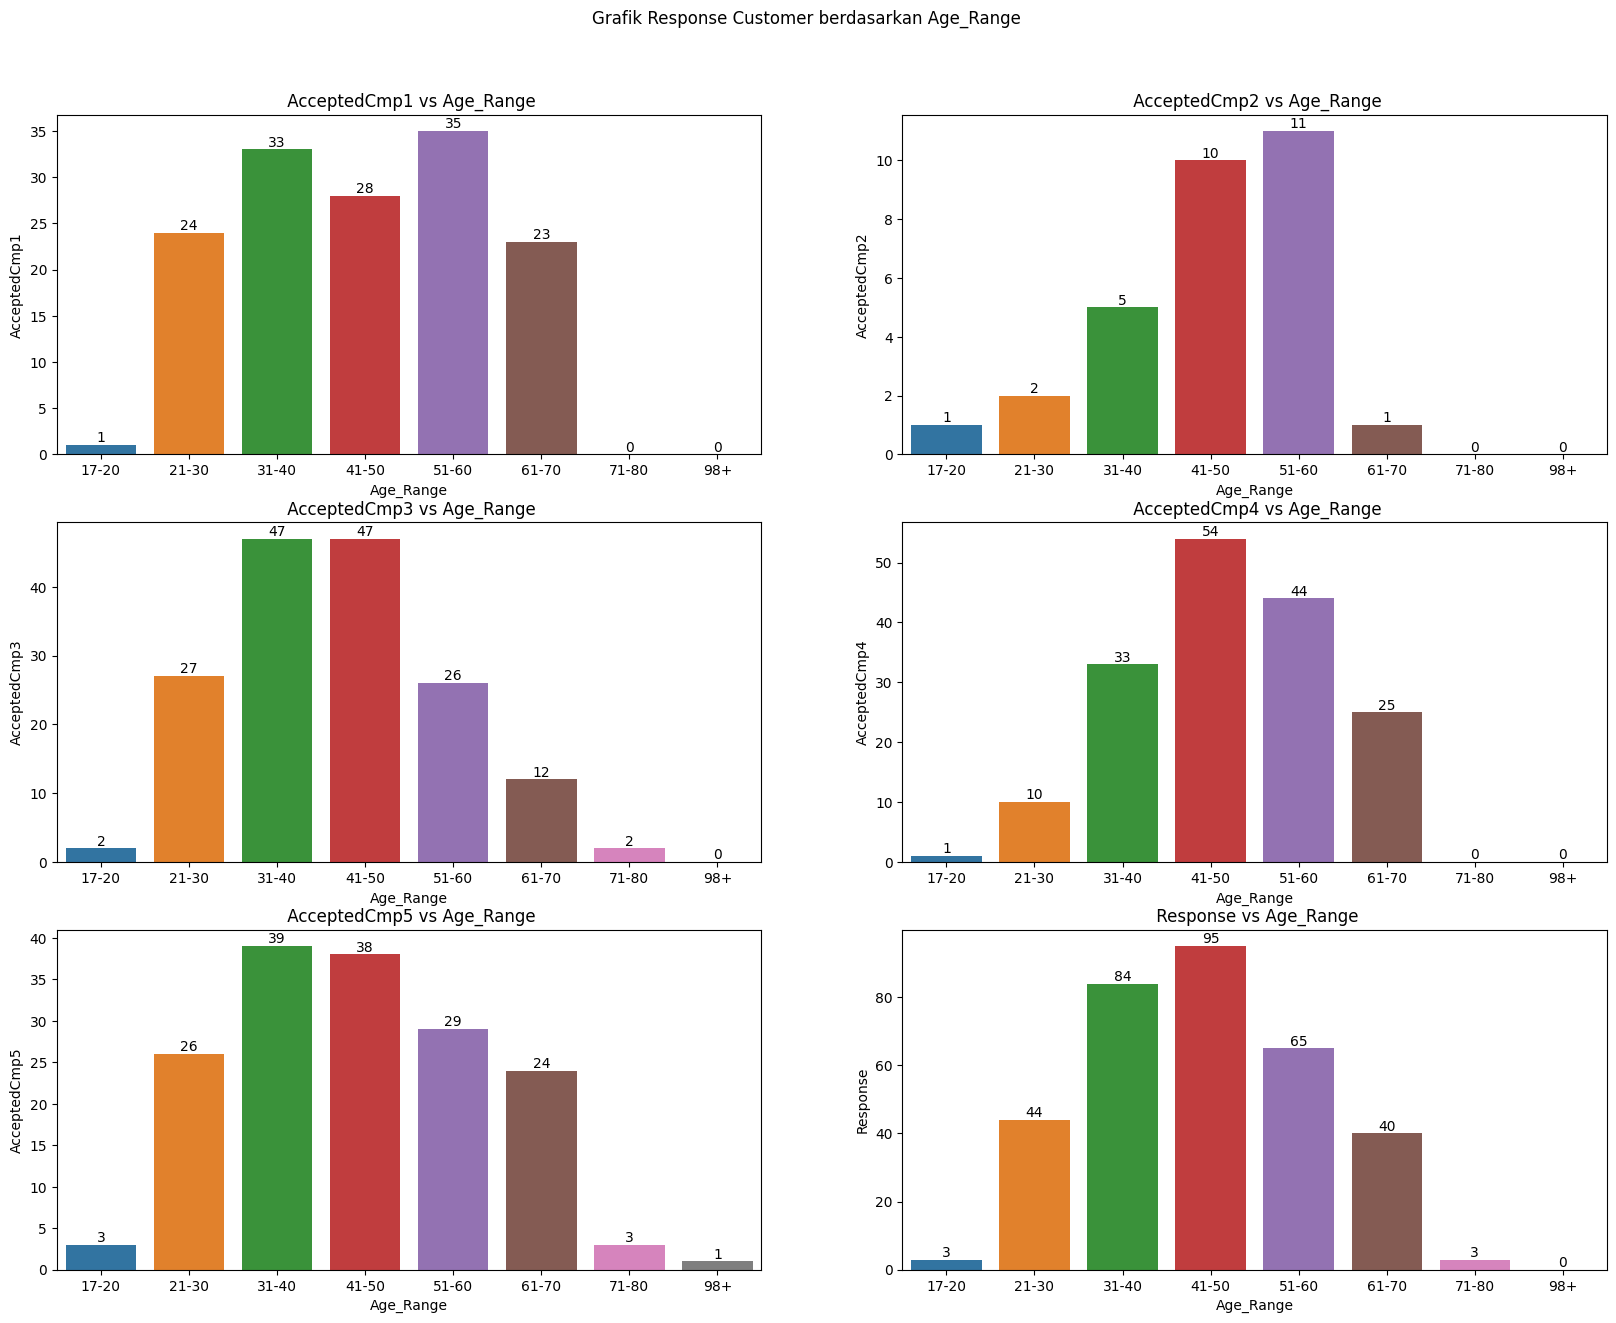

In [233]:
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x=df['Age_Range'].sort_values(), y = list_column1[id], ci=0, estimator=sum)
        plt.title(f' {list_column1[id]} vs Age_Range')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Response Customer berdasarkan Age_Range", y=0.95)
plt.show()

**Insight**

- Disini kita bisa melihat dari grafik-grafik diatas bahwa penawaran yang diberikan cukup berpengaruh dengan baik di rentang usia **41-50** sedangkan yang teredah berada di rentang usia **98+**
- Dan `Response` dari konsumen yang tertinggi juga berada di rentang usia **41-50** dan yang terendah berada di rentang usia **98+**

In [234]:

dfcustomer=df.groupby('ID')[['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response']].sum()
dfcuscorr=dfcustomer.corr('spearman')
matriks = np.triu(dfcuscorr)
matriks

array([[ 1.        , -0.03978508,  0.09962887,  0.39784918, -0.03592122],
       [ 0.        ,  1.        ,  0.70861247, -0.53624505,  0.23321567],
       [ 0.        ,  0.        ,  1.        , -0.45420369,  0.05336127],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.01073671],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

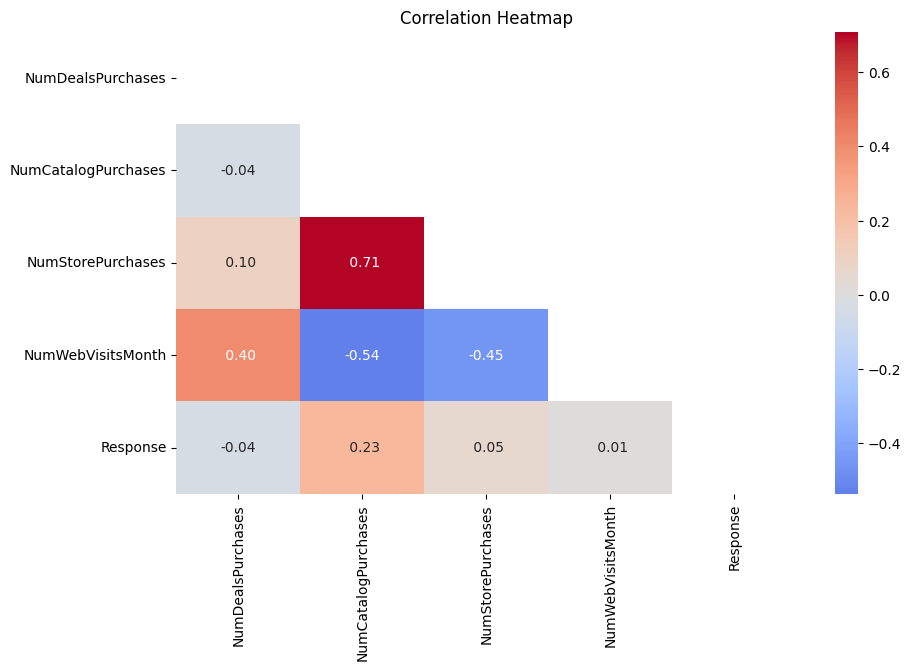

In [235]:
plt.figure(figsize=(10,6))
sns.heatmap(data=dfcuscorr,fmt= ' .2f', annot=True, cmap='coolwarm', center=0, mask=matriks)

plt.title('Correlation Heatmap')
plt.show()

**Insight**

- Warna gelap menunjukkan korelasi yang semakin kuat.
-Warna merah gelap menunjukkan hubungan yang positif, semakin gelap maka hubungannnya positif dan semakin kuat.
- Warna pucat menunjukkan hubungan korelasi semakin lemah.
- `NumCatalogPurchases` dan `NumStorePurchases` menunjukkan hubungan *`Moderate Positive`*, semakin tinggi keterangan di katalog maka semakin tinggi daya beli konsumen di `NumstorePurchases`. 
- `NumDealsPurchases` dan `Response` menunjukkan hubungan weak negative, semakin sedikit promo di  `NumDealsPurchases` semakin kecil `Response` dari konsumen.

In [236]:
list_column2=['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
list_column2

['NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth']

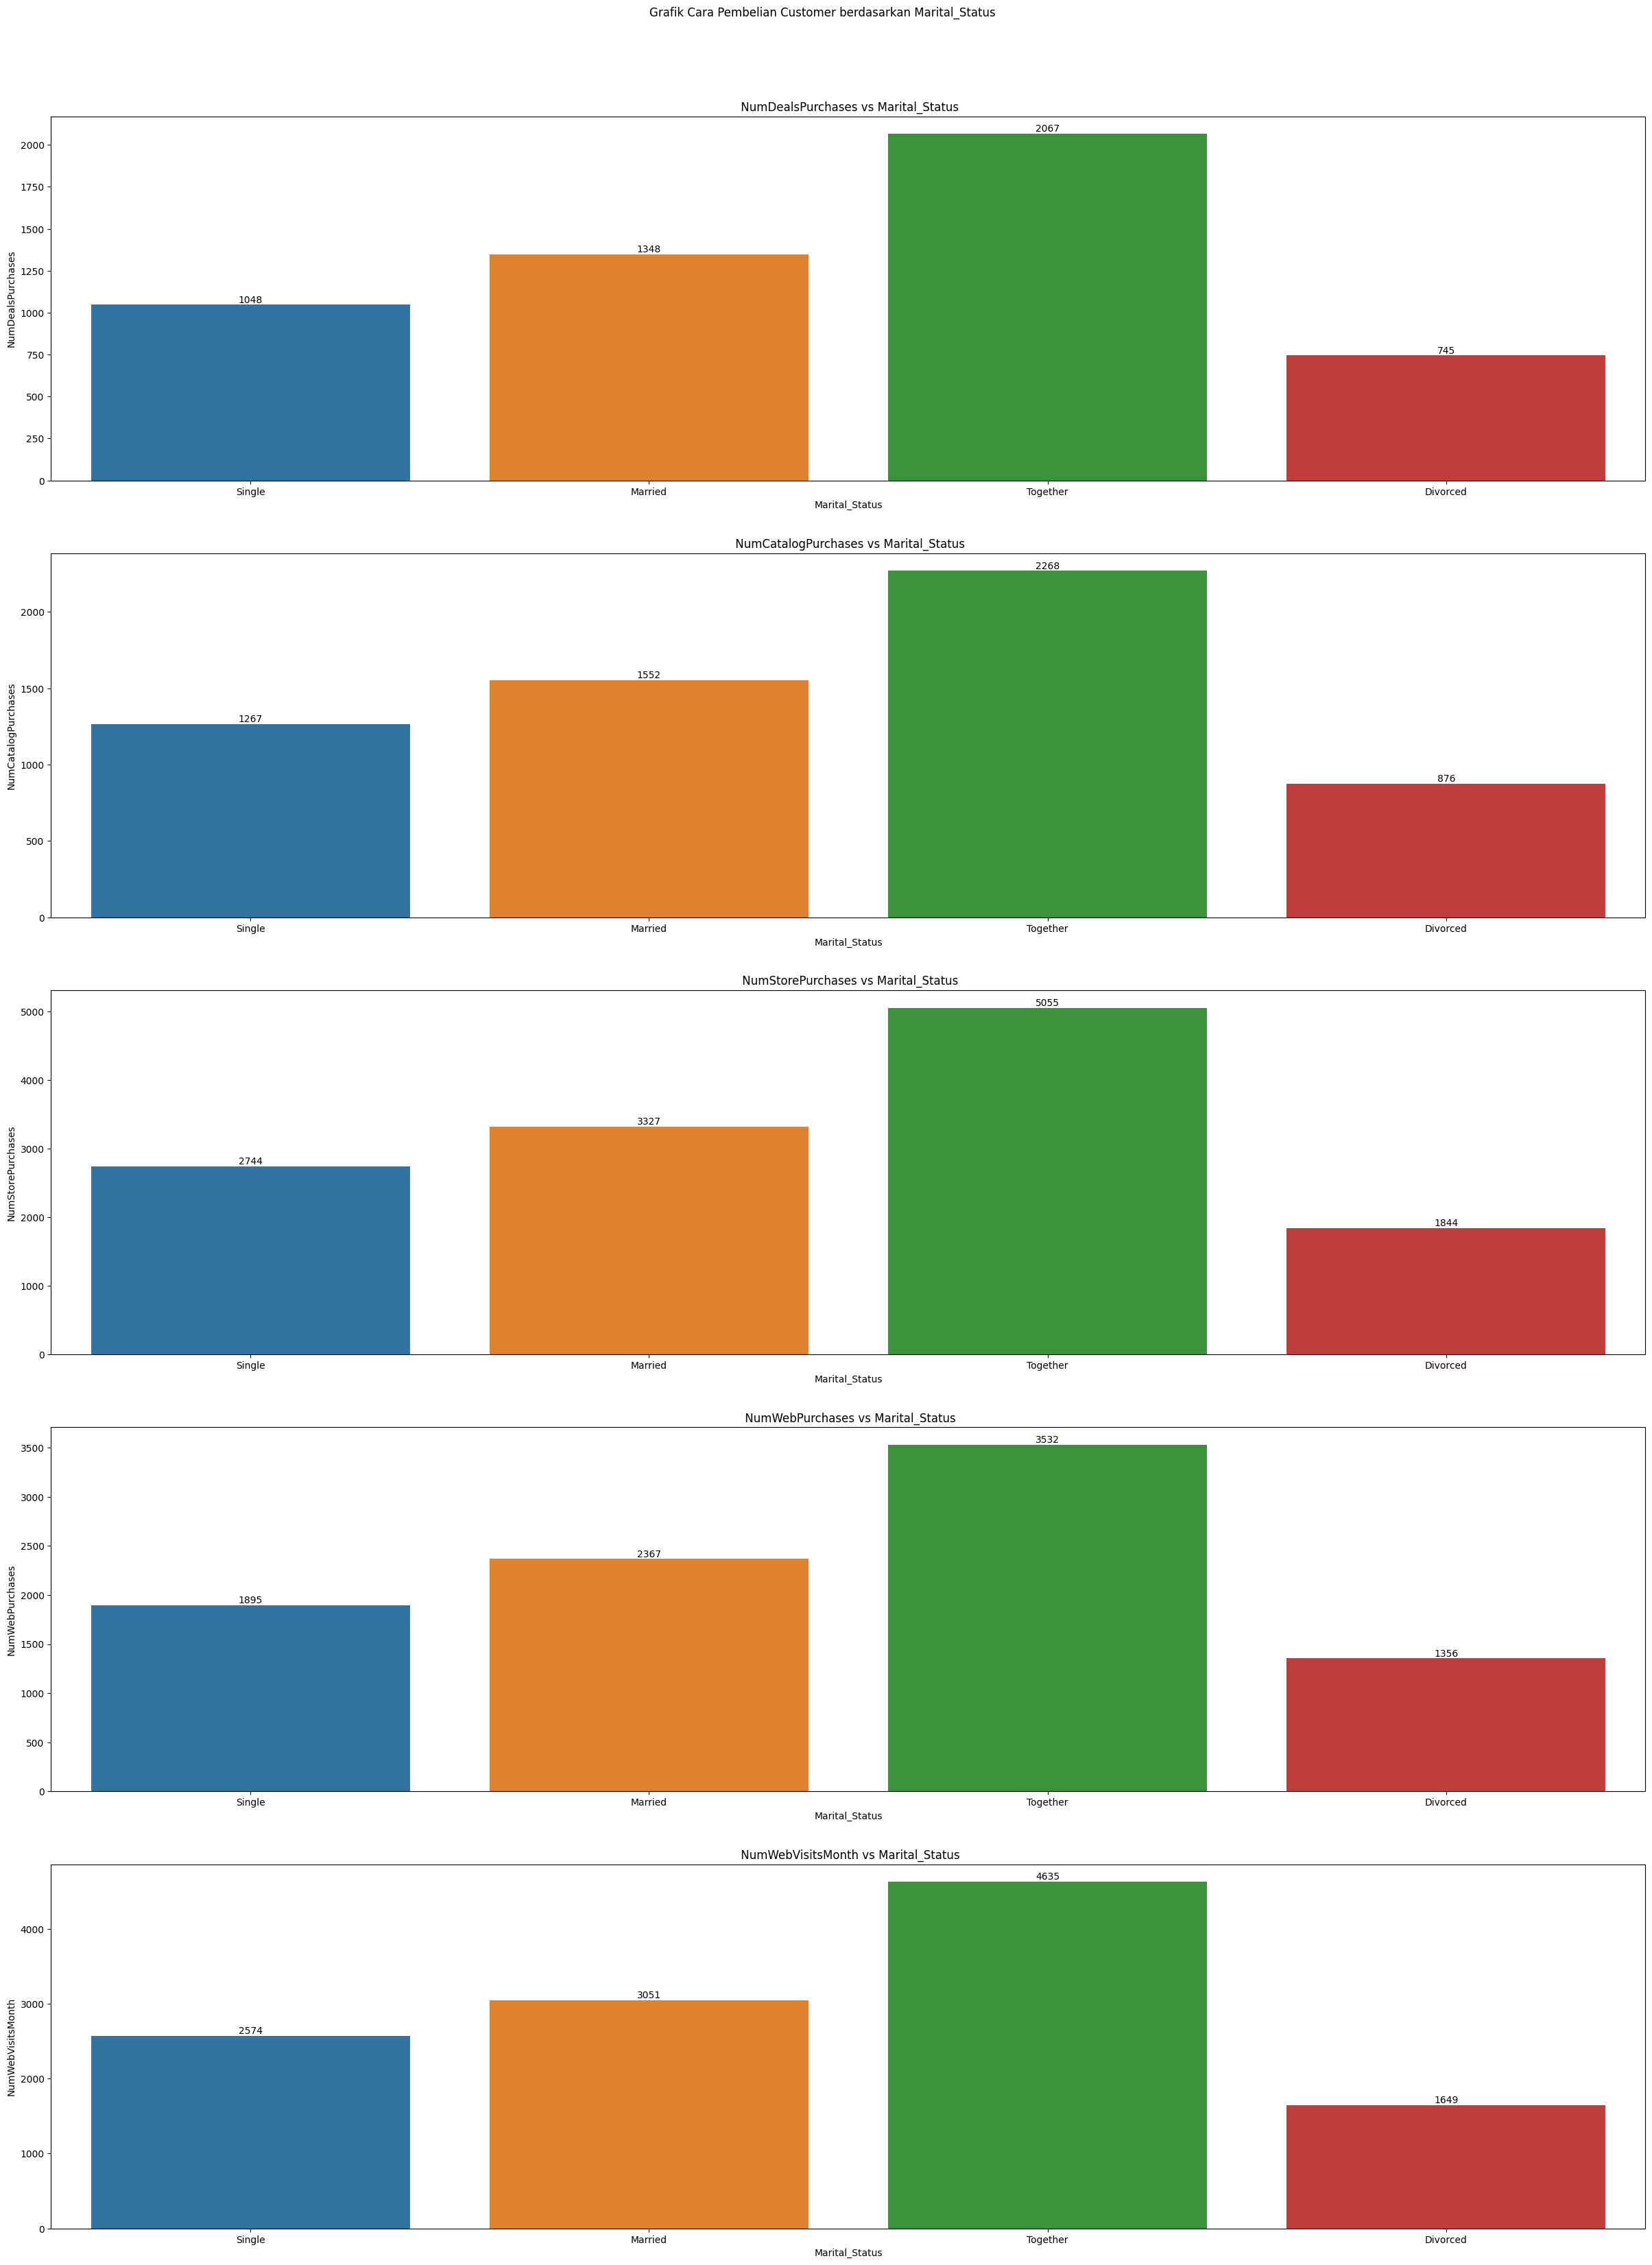

In [237]:
id = 0
n_rows = 5
n_cols = 1
plt.figure(figsize=(30,40))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Marital_Status', y = list_column2[id], ci=0, estimator=sum)
        plt.title(f' {list_column2[id]} vs Marital_Status')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Cara Pembelian Customer berdasarkan Marital_Status",y=0.92)
plt.show()

**Insight**

- Dari data diatas kita bisa melihat bahwa yang berpasangan mempunyai daya beli yang tinggi via **promo, katalog, mengunjungi toko dan web** dan yang terendah berada status **Single atau Divorced**.
- Kita bisa menyimpulkan bahwa **promo, Katalog, mengunjungi toko dan web** masih berpengaruh dengan baik dengan daya beli konsumen.


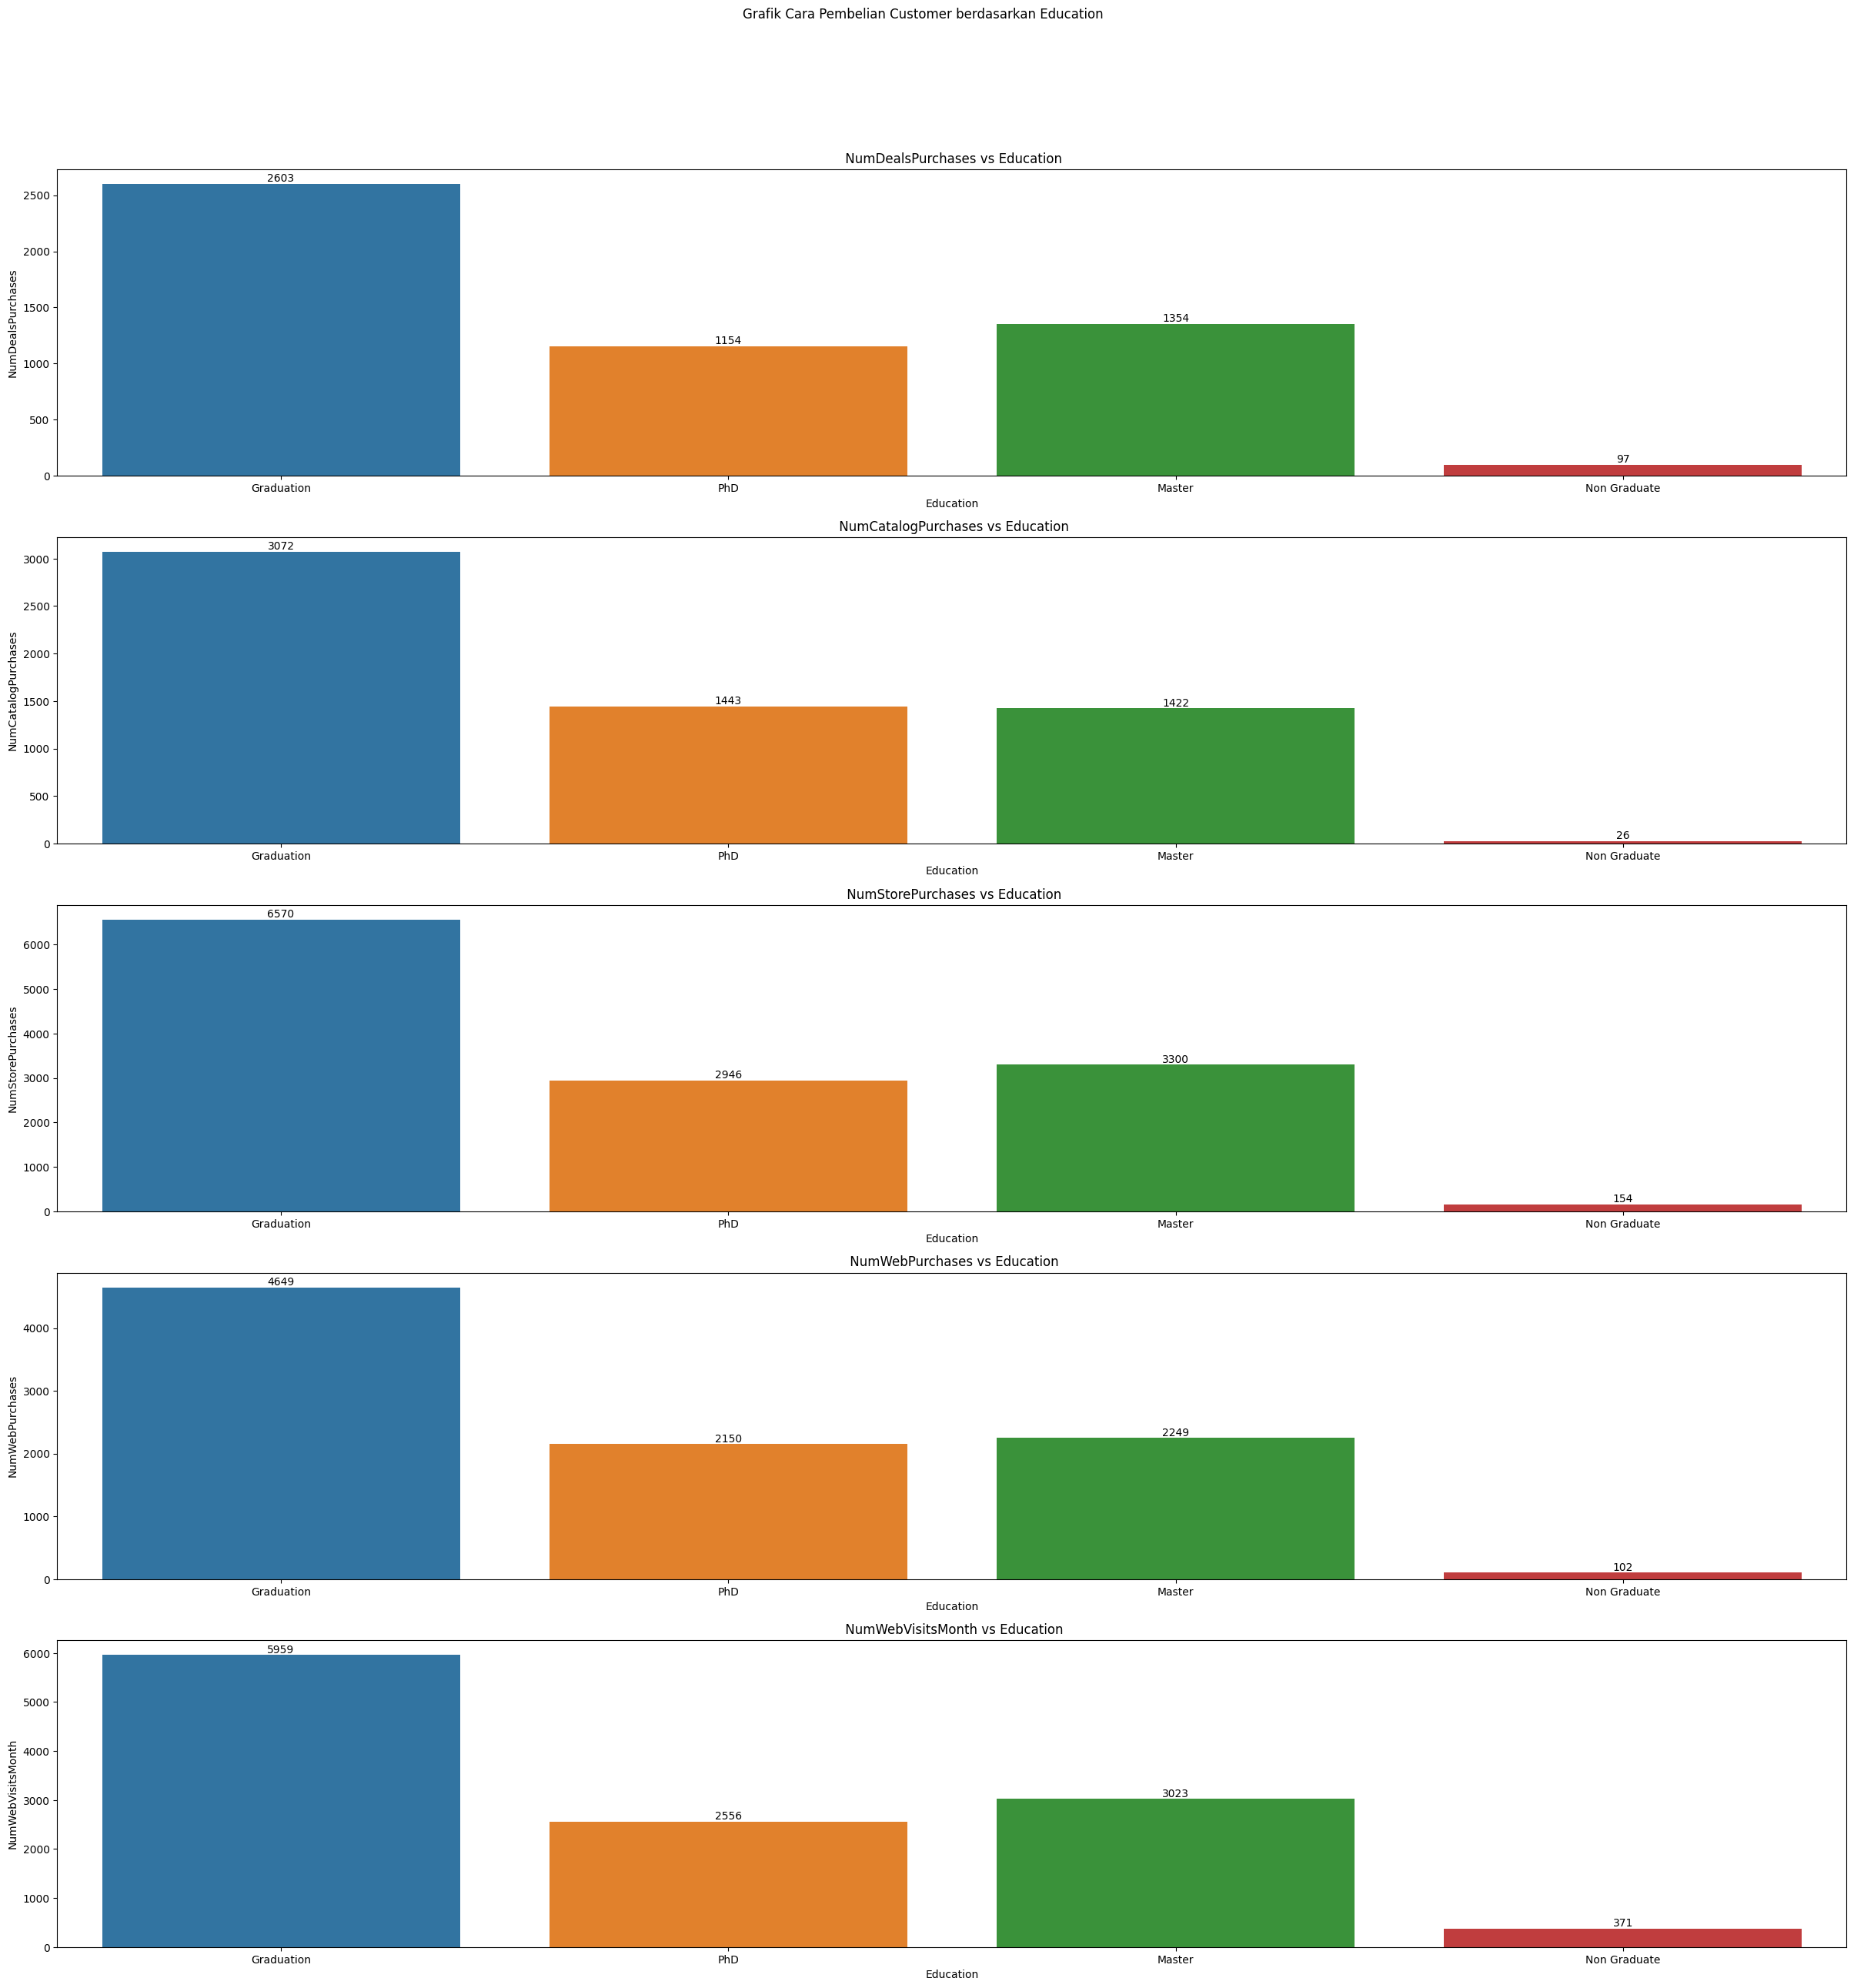

In [238]:
id = 0
n_rows = 5
n_cols = 1
plt.figure(figsize=(30,30))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Education', y = list_column2[id], ci=0, estimator=sum)
        plt.title(f' {list_column2[id]} vs Education')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Cara Pembelian Customer berdasarkan Education", y=0.95)
plt.show()

**Insight**

- Dari data diatas kita bisa melihat bahwa yang **tingkat pendidikan** mempunyai daya beli yang tinggi via **promo, katalog, mengunjungi toko dan web** dan yang terendah berada status **Non Graduate**.
- Kita bisa menyimpulkan bahwa **promo, katalog, mengunjungi toko dan web** masih berpengaruh dengan baik dengan daya beli konsumen.

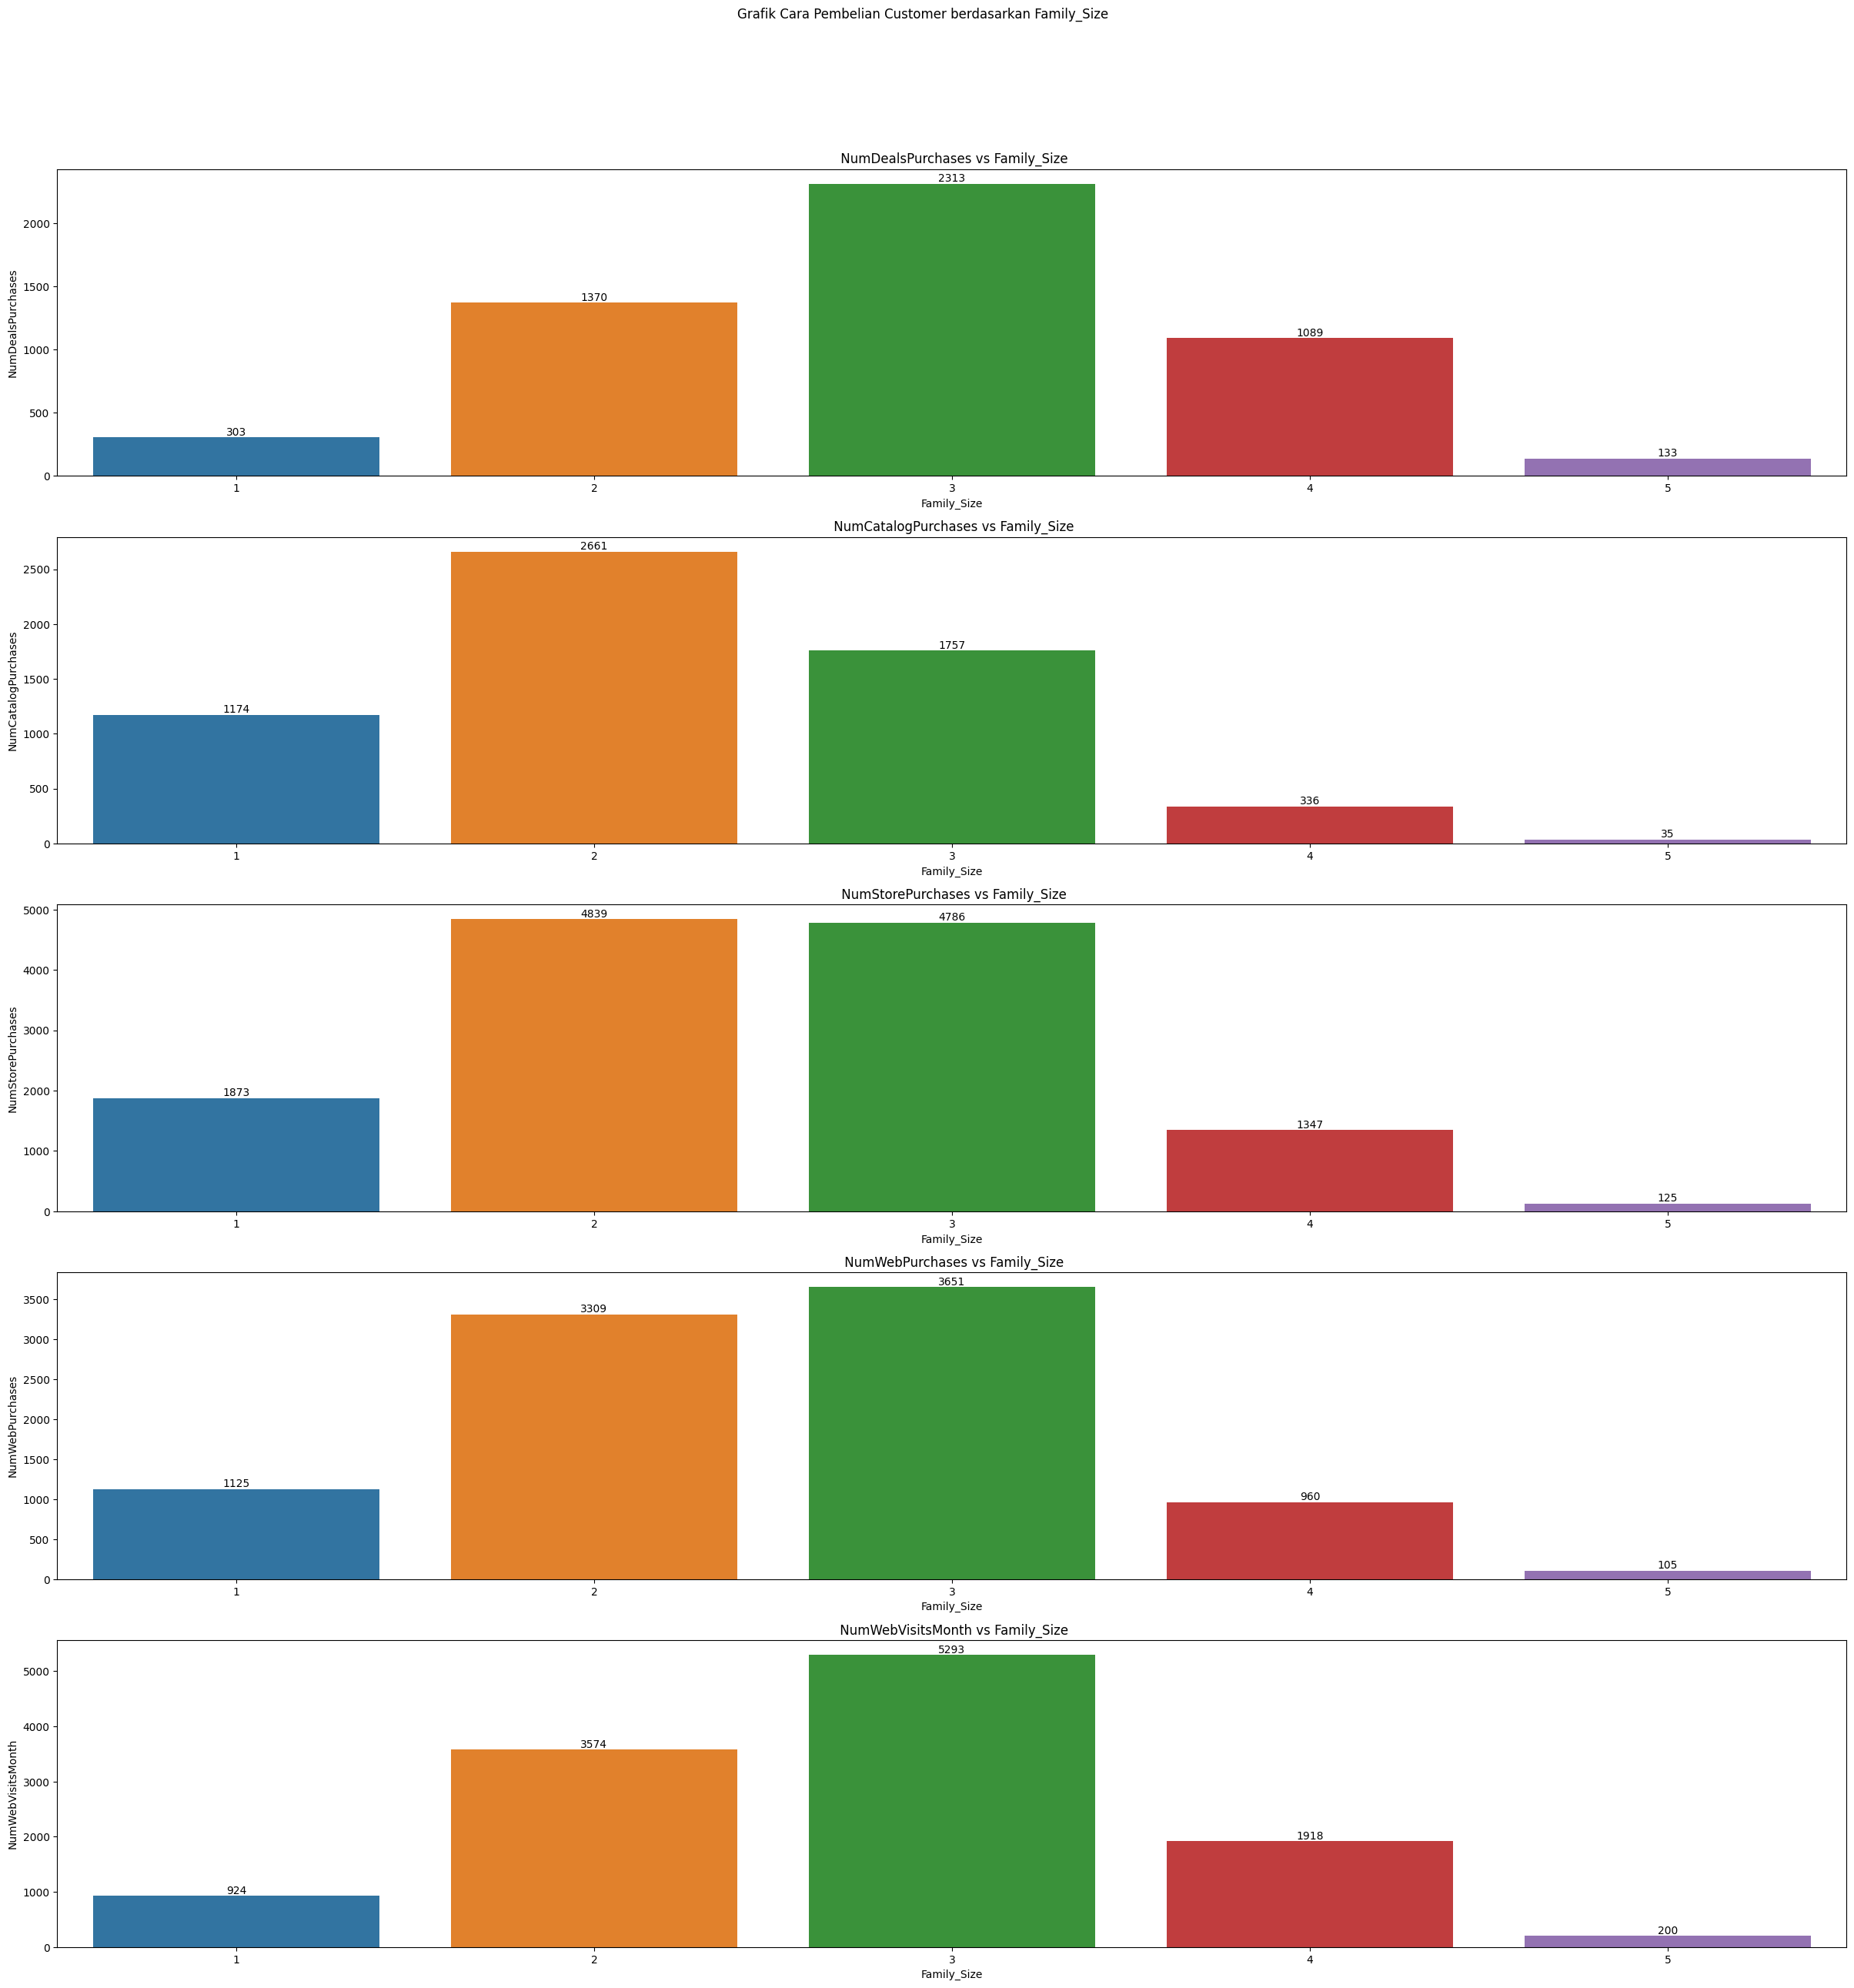

In [239]:
id = 0
n_rows = 5
n_cols = 1
plt.figure(figsize=(30,30))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x='Family_Size', y = list_column2[id], ci=0, estimator=sum)
        plt.title(f' {list_column2[id]} vs Family_Size')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Cara Pembelian Customer berdasarkan Family_Size", y=0.95)
plt.show()

**Insight**

- Dari data diatas kita bisa melihat bahwa yang beranggotakan banyak maupun sedikit masih  mempunyai daya beli yang cukup baik via **katalog, mengunjungi toko dan web**.
- Kita bisa menyimpulkan bahwa **Katalog, mengunjungi toko dan web** masih berpengaruh dengan baik dengan daya beli konsumen.

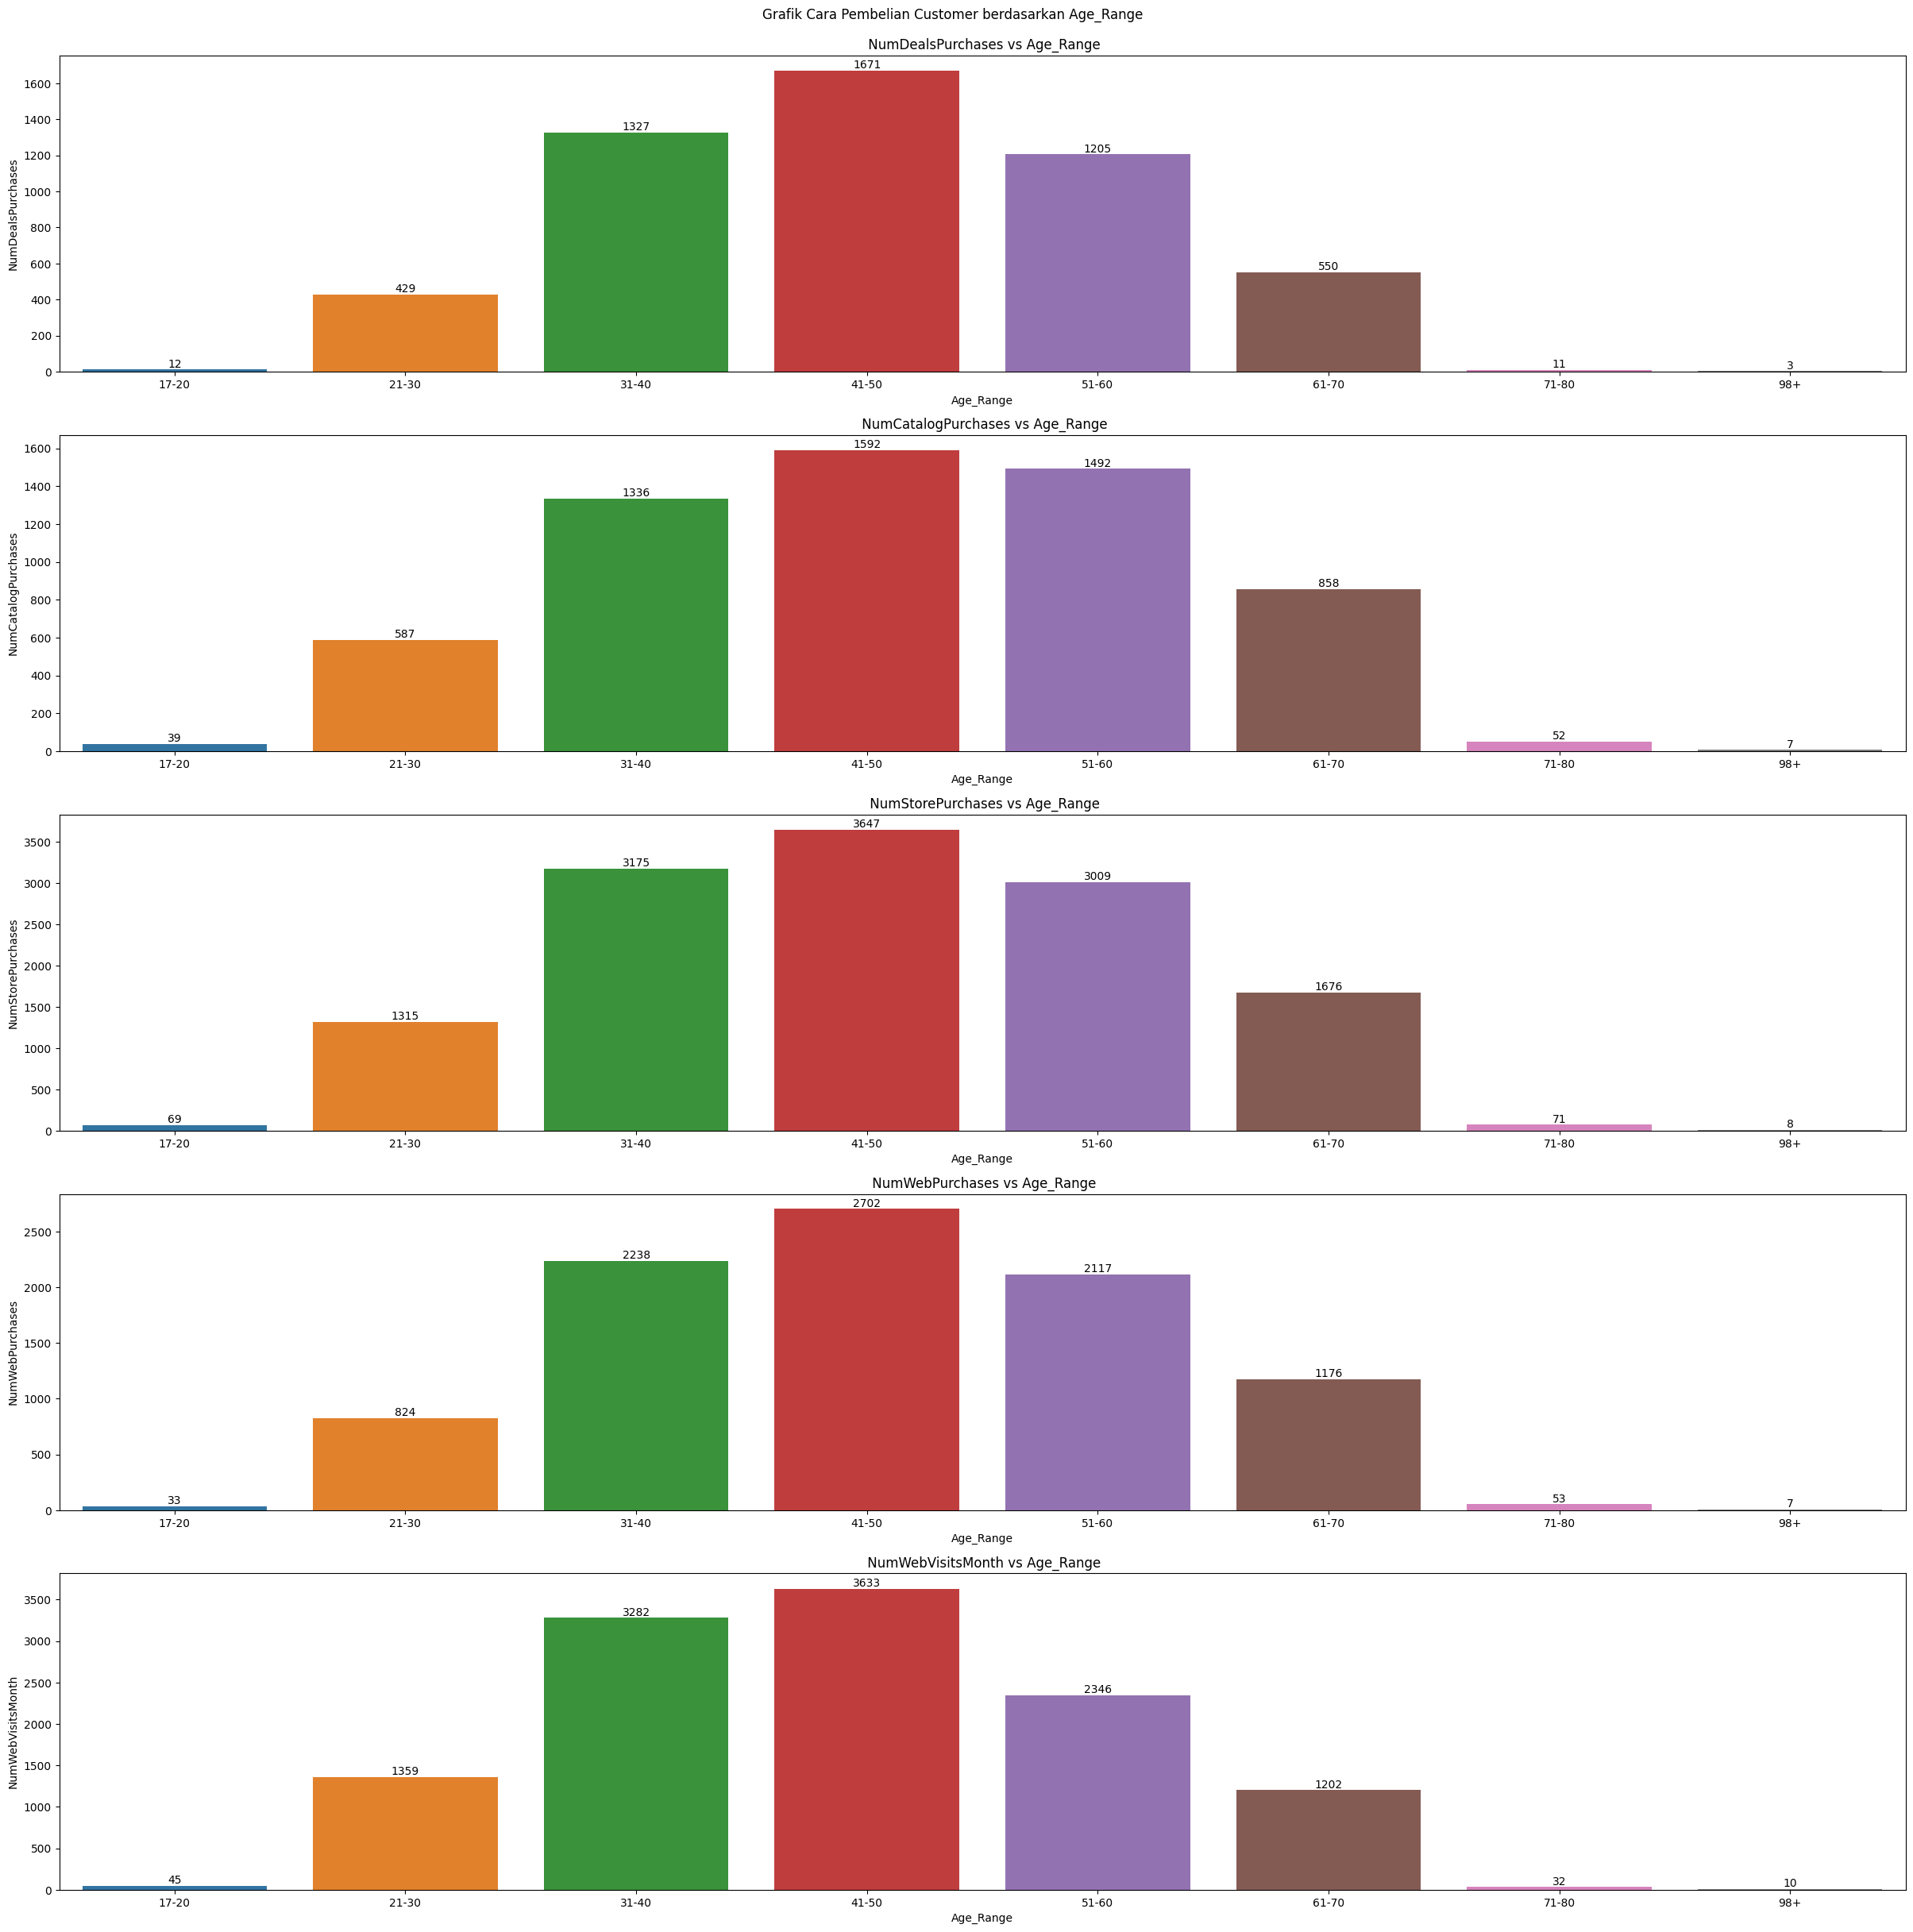

In [240]:
id = 0
n_rows = 5
n_cols = 1
plt.figure(figsize=(30,30))

for i in range(n_rows) :
    for j in range(n_cols) :

        plt.subplot(n_rows, n_cols, id + 1)
        n=sns.barplot(data=df, x=df['Age_Range'].sort_values(), y = list_column2[id], ci=0, estimator=sum)
        plt.title(f' {list_column2[id]} vs Age_Range')
        id += 1
        for i in n.containers:
            n.bar_label(i,)
plt.suptitle("Grafik Cara Pembelian Customer berdasarkan Age_Range", y=0.90)
plt.show()

**Insight**

- Dari data diatas kita bisa melihat bahwa yang rentang usia yang tinggi via **promo, katalog, mengunjungi toko dan web** adalah **41-50** dan yang terendah berada status **98+**.
- Kita bisa menyimpulkan bahwa **promo, katalog, mengunjungi toko dan web** masih berpengaruh dengan baik dengan daya beli konsumen.

In [241]:
dfcomplain=df['Complain'].value_counts().to_frame().reset_index()
dfcomplain

,Complain,count
0,0,2219
1,1,21


In [242]:
df[df['Complain']==1].count()/2240*100


ID                     0.9375
Year_Birth             0.9375
Education              0.9375
Marital_Status         0.9375
Income                 0.9375
Kidhome                0.9375
Teenhome               0.9375
Dt_Customer            0.9375
Recency                0.9375
MntWines               0.9375
MntFruits              0.9375
MntMeatProducts        0.9375
MntFishProducts        0.9375
MntSweetProducts       0.9375
MntGoldProds           0.9375
NumDealsPurchases      0.9375
NumWebPurchases        0.9375
NumCatalogPurchases    0.9375
NumStorePurchases      0.9375
NumWebVisitsMonth      0.9375
AcceptedCmp3           0.9375
AcceptedCmp4           0.9375
AcceptedCmp5           0.9375
AcceptedCmp1           0.9375
AcceptedCmp2           0.9375
Complain               0.9375
Response               0.9375
Total_Spend            0.9375
Age                    0.9375
Age_Range              0.9375
Living_With            0.9375
Childrens              0.9375
Family_Size            0.9375
Campaign  

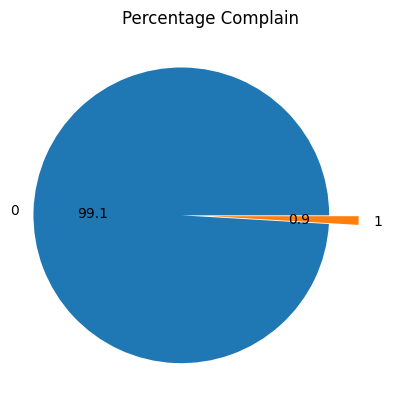

In [243]:
plt.pie(
    x = dfcomplain['count'],            
    labels = dfcomplain['Complain'],    
    autopct = f'%.1f',                  
    explode= [0.2, 0]                
)

plt.title('Percentage Complain')
plt.show()

**Insight**

-  Disini kita melihat bahwa penawaran via promo, katalog, pelayanan toko, dan web sudah bagus. 
- Karena komplain dari konsumen sebesar 0.93% sedangkan sisanya merasa puas.

In [260]:
df.to_excel('df_supermarket_clean.xlsx', index=True)

# ***Kesimpulan dan Rekomendasi***

**Dari analysis yang dilakukan maka kita bisa memberikan kesimpulan:**

- Semakin tinggi income konsumen maka semakin tinggi juga daya beli konsumen.
- Status, pendidikan, jumlah anggota keluarga dan rentang usia juga sangat berpengaruh terhadap daya beli konsumen.
- Status, pendidikan, jumlah anggota keluarga dan rentang usia juga sangat berpengaruh terhadap campaign-campaign yang dilakukan oleh perusahaan.
- Akses pembelian juga sangat berpengaruh terhadap daya beli konsumen.

**Rekomendasi**

- Melakukan target pemsaran berdasarkan Status, pendidikan, jumlah anggota keluarga dan rentang usia lebih baik lagi.
- Campaign-campaign tetap dilakukan agar bisa menarik minat konsumen dan bertambahnya konsumen-konsumen baru.
- Akses pemebelian seperti katalog lebih diperbagus lagi, sarana store lebih baik lagi agar konsumen senang dan nyaman berkunjung ke store, dan design web dibikin lebih menarik lagi agar konsumen juga senang menggunakannya dan lebih praktis.